# Rainfall Prediction - Weather Forecasting

# Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Here, predict two things:
 
###### Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


###### Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [403]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [404]:
# Loading the Dataset

dfw=pd.read_csv('weatherAUS.csv')
dfw

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

# Exploratory Data Analysis

In [405]:
# Checking the top rows

dfw.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [406]:
# Checking the bottom rows
dfw.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [407]:
dfw.sample()

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5174  2011-08-20  Melbourne      9.8     18.5       0.0          0.8   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
5174       6.7           N           24.0          W  ...        83.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
5174         47.0       1031.8       1030.2       NaN       NaN     10.7   

      Temp3pm  RainToday  RainTomorrow  
5174     18.1         No            No  

[1 rows x 23 columns]

In [408]:
# Checking the information of data
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [409]:
# Checking the shape

dfw.shape

(8425, 23)

There are 8425 rows and 23 columns

In [410]:
#Checking the columns name
dfw.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [411]:
# Checking the unique value in columns
dfw.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [412]:
# Checking the counts of each columns
for i in dfw:
    print(dfw[i].value_counts())
    print("************************************************************")

2011-06-12    5
2011-02-12    5
2011-03-02    5
2011-03-16    5
2011-05-19    5
             ..
2012-11-18    1
2013-06-04    1
2013-06-06    1
2013-03-24    1
2013-06-03    1
Name: Date, Length: 3004, dtype: int64
************************************************************
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
************************************************************
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.5      1
 25.9     1
-0.8      1
-1.4      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
************************************************************
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 331,

In [413]:
# Checking the data types

dfw.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

There are float and object data types present in data. In Date columns, the data type shows as object, that is not correct. Lets change to datetime data types

In [414]:
import datetime as dt

In [415]:
# Splitting Date into Day, Month and Year
dfw['Day']=pd.to_datetime(dfw.Date).dt.day
dfw['Month']=pd.to_datetime(dfw.Date).dt.month
dfw['Year']=pd.to_datetime(dfw.Date).dt.year

In [416]:
dfw.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1       8.0       NaN   
1         WNW           44.0        NNW  ...      1007.8       NaN       NaN   
2         WSW           46.0          W  ...      1008.7       NaN       2.0   
3          NE           24.0         SE  ...      1012.8       NaN       NaN   
4           W           41.0        ENE  ...      1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 26 columns]

In [417]:
# Let's drop the Date Column

dfw=dfw.drop('Date',axis=1)

In [418]:
dfw.head(2) # Date column has been removed from data set

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  

[2 rows x 25 columns]

In [419]:
# Let's check the count of each columns

for i in dfw:
    print(dfw[i].value_counts())
    print("*************************************************")

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
*************************************************
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.5      1
 25.9     1
-0.8      1
-1.4      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
*************************************************
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 331, dtype: int64
*************************************************
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
41.2        1
240.0       1
67.0        1
128.0       1
6.3         1
Name: Rainfall, Length: 250, dtype: int64
**************************************

In [420]:
dfw['Year'].unique()

array([2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2012],
      dtype=int64)

In [421]:
# Checking the categorical data

categorical_data=[]
for i in dfw.dtypes.index:
    if dfw.dtypes[i]=='object':
        categorical_data.append(i)
print(categorical_data)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [422]:
# Checking the Numerical data

numerical_data=[]
for i in dfw.dtypes.index:
    if dfw.dtypes[i]!='object':
        numerical_data.append(i)
print(numerical_data)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [423]:
# Checking the Null value

dfw.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

There are lots of null value present in the dataset except Location, Day, Month, Year

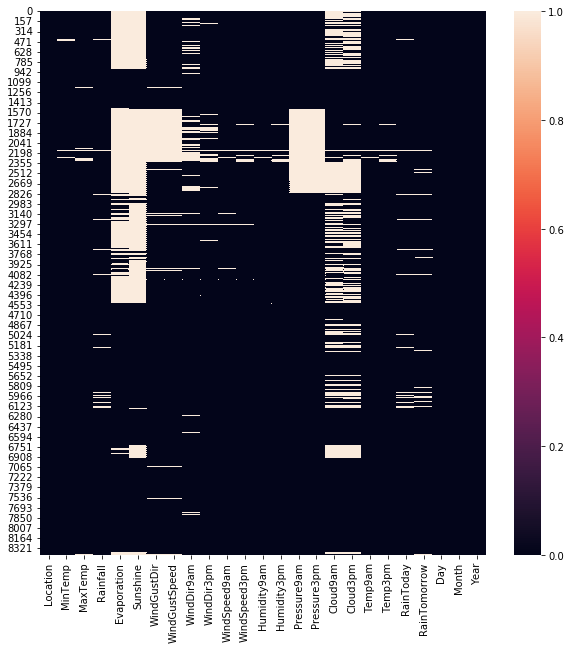

In [424]:
plt.figure(figsize=(10,10))
sns.heatmap(dfw.isnull())
plt.show()

There is lots of null value in Evaporation, Sunshine, Cloud9am, Cloud3am. Let's drop this columns

In [425]:
dfw=dfw.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'])

In [426]:
dfw.shape

(8425, 21)

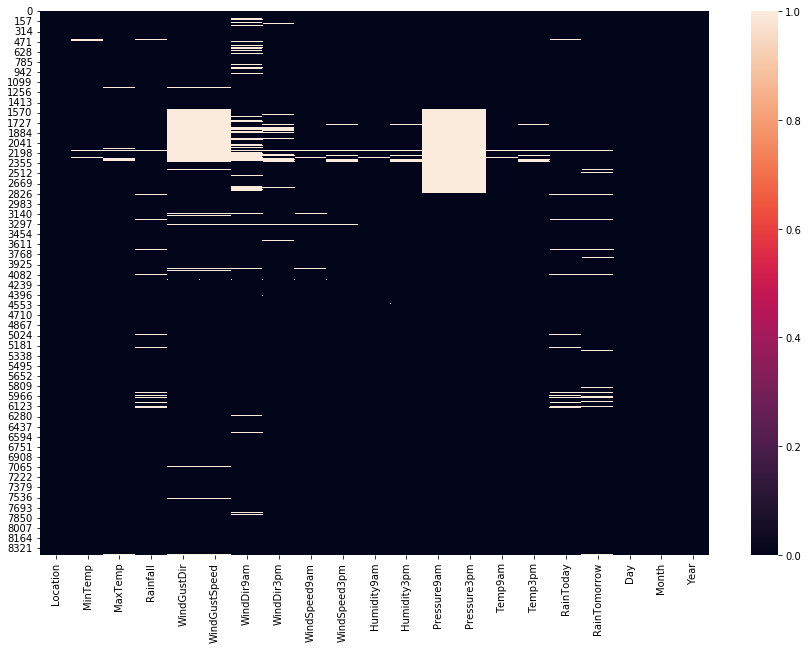

In [427]:
plt.figure(figsize=(15,10))
sns.heatmap(dfw.isnull())
plt.show()

In [428]:
# Lets replace the null value with mean for numerical data

dfw['MinTemp']=dfw['MinTemp'].fillna(dfw['MinTemp'].mean())
dfw['MaxTemp']=dfw['MaxTemp'].fillna(dfw['MaxTemp'].mean())
dfw['Rainfall']=dfw['Rainfall'].fillna(dfw['Rainfall'].mean())
dfw['MinTemp']=dfw['MinTemp'].fillna(dfw['MinTemp'].mean())
dfw['WindGustSpeed']=dfw['WindGustSpeed'].fillna(dfw['WindGustSpeed'].mean())
dfw['WindSpeed9am']=dfw['WindSpeed9am'].fillna(dfw['WindSpeed9am'].mean())
dfw['WindSpeed3pm']=dfw['WindSpeed3pm'].fillna(dfw['WindSpeed3pm'].mean())
dfw['Humidity9am']=dfw['Humidity9am'].fillna(dfw['Humidity9am'].mean())
dfw['Humidity3pm']=dfw['Humidity3pm'].fillna(dfw['Humidity3pm'].mean())
dfw['Pressure9am']=dfw['Pressure9am'].fillna(dfw['Pressure9am'].mean())
dfw['Pressure3pm']=dfw['Pressure3pm'].fillna(dfw['Pressure3pm'].mean())
dfw['Temp9am']=dfw['Temp9am'].fillna(dfw['Temp9am'].mean())
dfw['Temp3pm']=dfw['Temp3pm'].fillna(dfw['Temp3pm'].mean())

In [429]:
# Let's replace the null value with mode for categorical data

dfw['WindGustDir']=dfw['WindGustDir'].fillna(dfw['WindGustDir'].mode()[0])
dfw['WindDir9am']=dfw['WindDir9am'].fillna(dfw['WindDir9am'].mode()[0])
dfw['WindDir3pm']=dfw['WindDir3pm'].fillna(dfw['WindDir3pm'].mode()[0])
dfw['RainToday']=dfw['RainToday'].fillna(dfw['RainToday'].mode()[0])
dfw['RainTomorrow']=dfw['RainTomorrow'].fillna(dfw['RainTomorrow'].mode()[0])

In [430]:
dfw.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

We have filled all the null value with mean and mode. There is no null value present in data

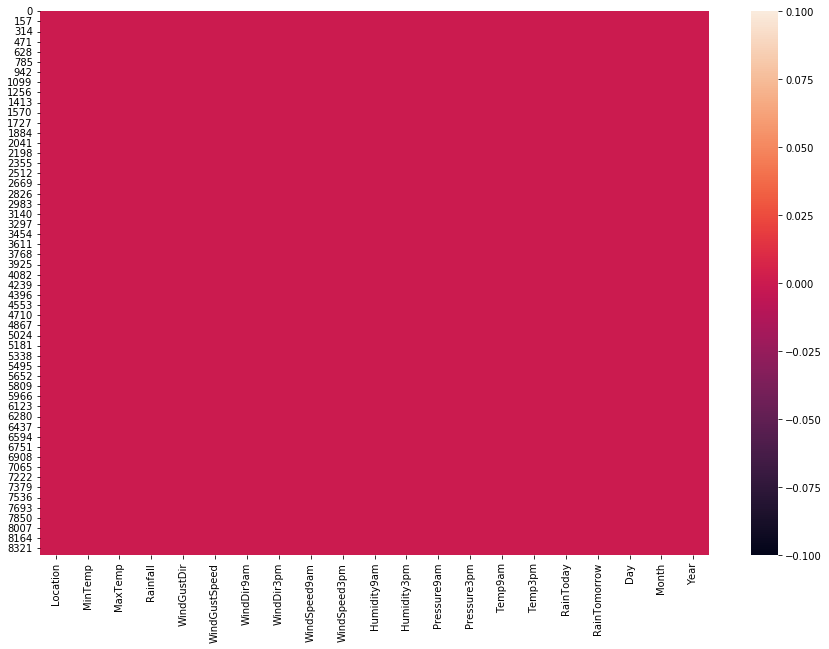

In [431]:
# Viewing the null value using the heatmap after replaced the null value
plt.figure(figsize=(15,10))
sns.heatmap(dfw.isnull())
plt.show()

In [432]:
# Checking the Statistical summary of data

dfw.describe()

MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  8425.000000  8425.000000  8425.000000    8425.000000   8425.000000   
mean     13.193305    23.859976     2.805913      40.174469     13.847646   
std       5.379488     6.114516    10.309308      13.776101     10.128579   
min      -2.000000     8.200000     0.000000       7.000000      0.000000   
25%       9.300000    19.300000     0.000000      31.000000      6.000000   
50%      13.200000    23.300000     0.000000      40.174469     13.000000   
75%      17.300000    28.000000     1.400000      48.000000     20.000000   
max      28.500000    45.500000   371.000000     107.000000     63.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean      18.533662    67.822496    51.249790  1017.640233  1015.236075   
std        9.704759    16.774231    18.311894     6.275759     6.217451   
min        0.000000    10.000000     6.000000   989.800000   982.900000   
25%       11.000000    56.000000    39.000000  1014.000000  1011.400000   
50%       19.000000    68.000000    51.000000  1017.640233  1015.236075   
75%       24.000000    80.000000    63.000000  1021.300000  1018.800000   
max       83.000000   100.000000    99.000000  1039.000000  1036.000000   

           Temp9am      Temp3pm          Day        Month         Year  
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000  
mean     17.762015    22.442934    15.741958     6.442136  2012.102433  
std       5.608301     5.945849     8.787354     3.437994     2.473137  
min       1.900000     7.300000     1.000000     1.000000  2008.000000  
25%      13.800000    18.100000     8.000000     3.000000  2010.000000  
50%      17.762015    22.000000    16.000000     6.000000  2011.000000  
75%      21.900000    26.300000    23.000000     9.000000  2014.000000  
max      39.400000    44.100000    31.000000    12.000000  2017.000000

In the count all the value shows 8425, this means there is no null value present.

In Rainfall, Windspeed, Mean value is greater than median(50%)

The Min Temperature is -2 and maximum temperature is 28

In Temp9am, Temp3am the median is greater than mean

In [433]:
dfw.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
Month              int64
Year               int64
dtype: object

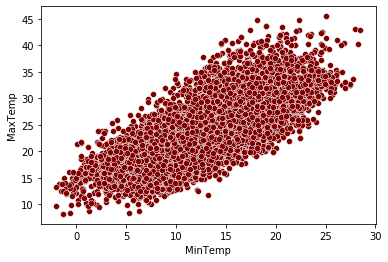

In [434]:
# Viewing the Min and Max temperature using scatterplot
sns.scatterplot(dfw['MinTemp'],dfw['MaxTemp'],color='maroon')
plt.show()

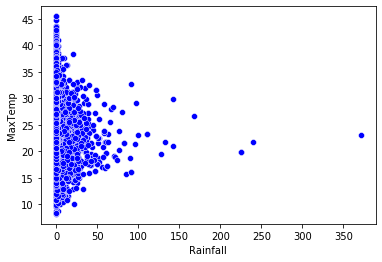

In [435]:
# Viewing the Max temp and Rainfall using scatterplot
sns.scatterplot(dfw['Rainfall'],dfw['MaxTemp'],color='blue')
plt.show()

As the temperature increases there is a less chance of Rainfall

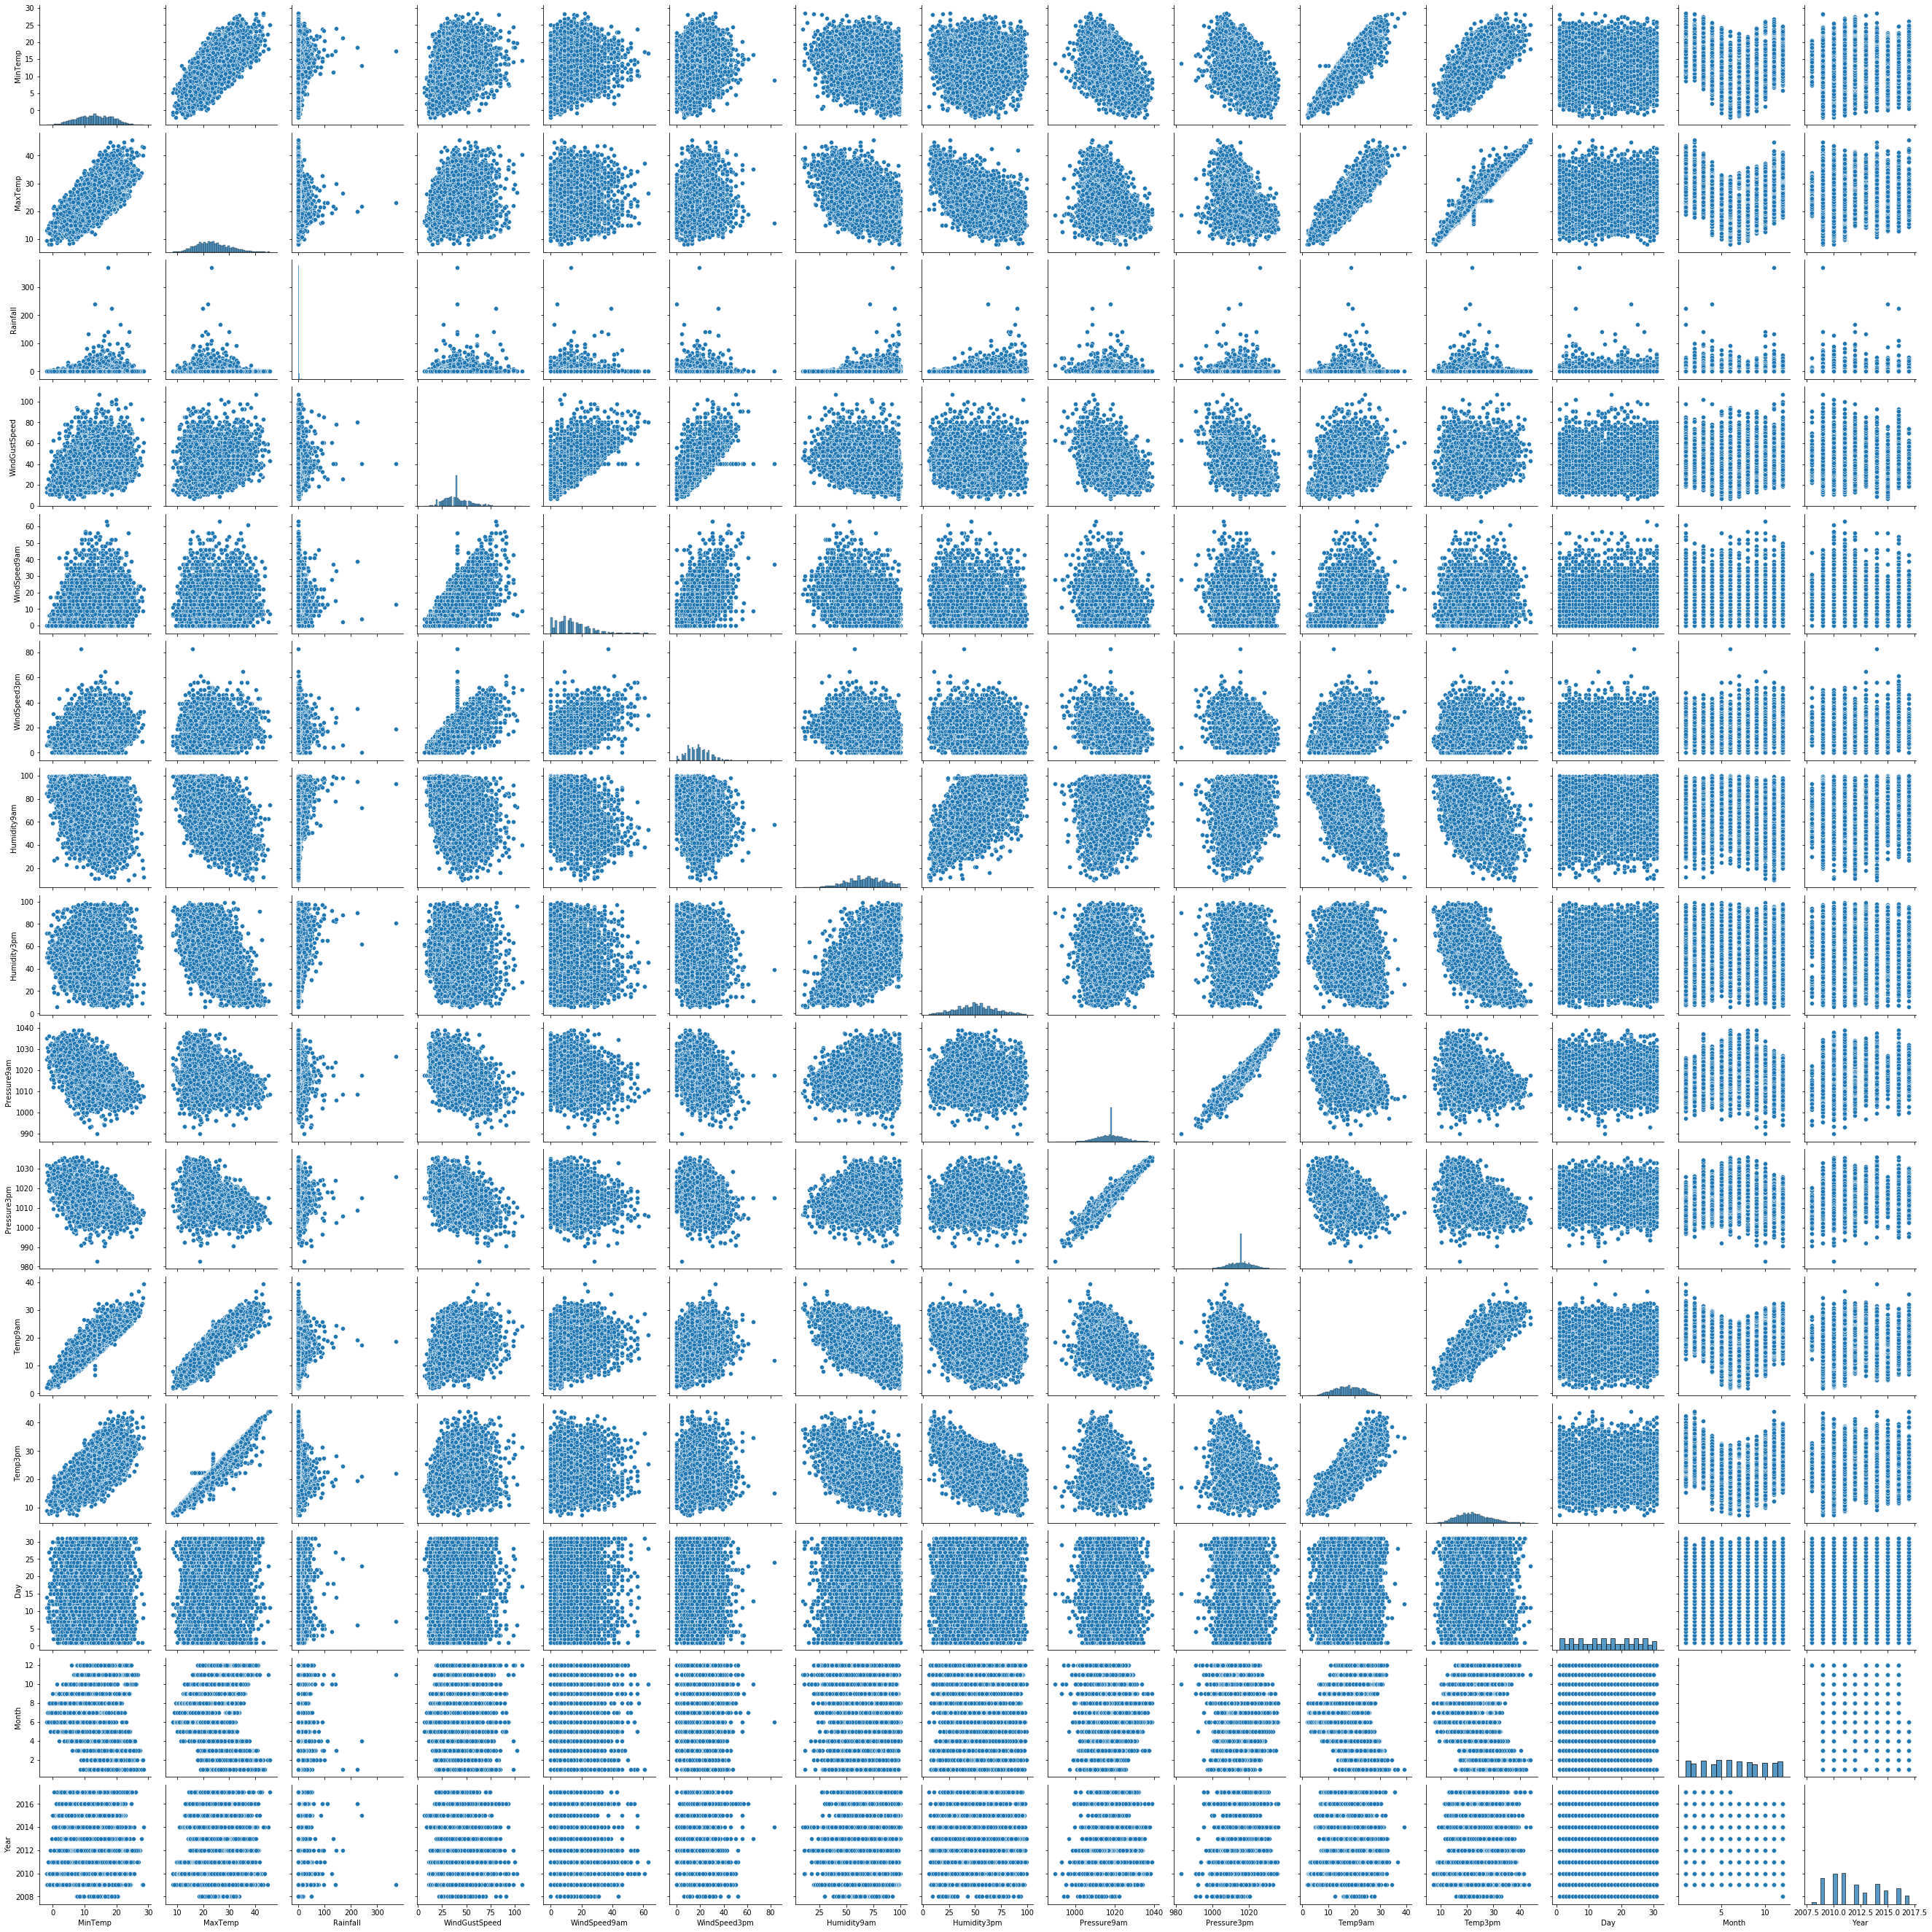

In [436]:
# Checking the relationship of each features using the Pairplot
sns.pairplot(dfw)

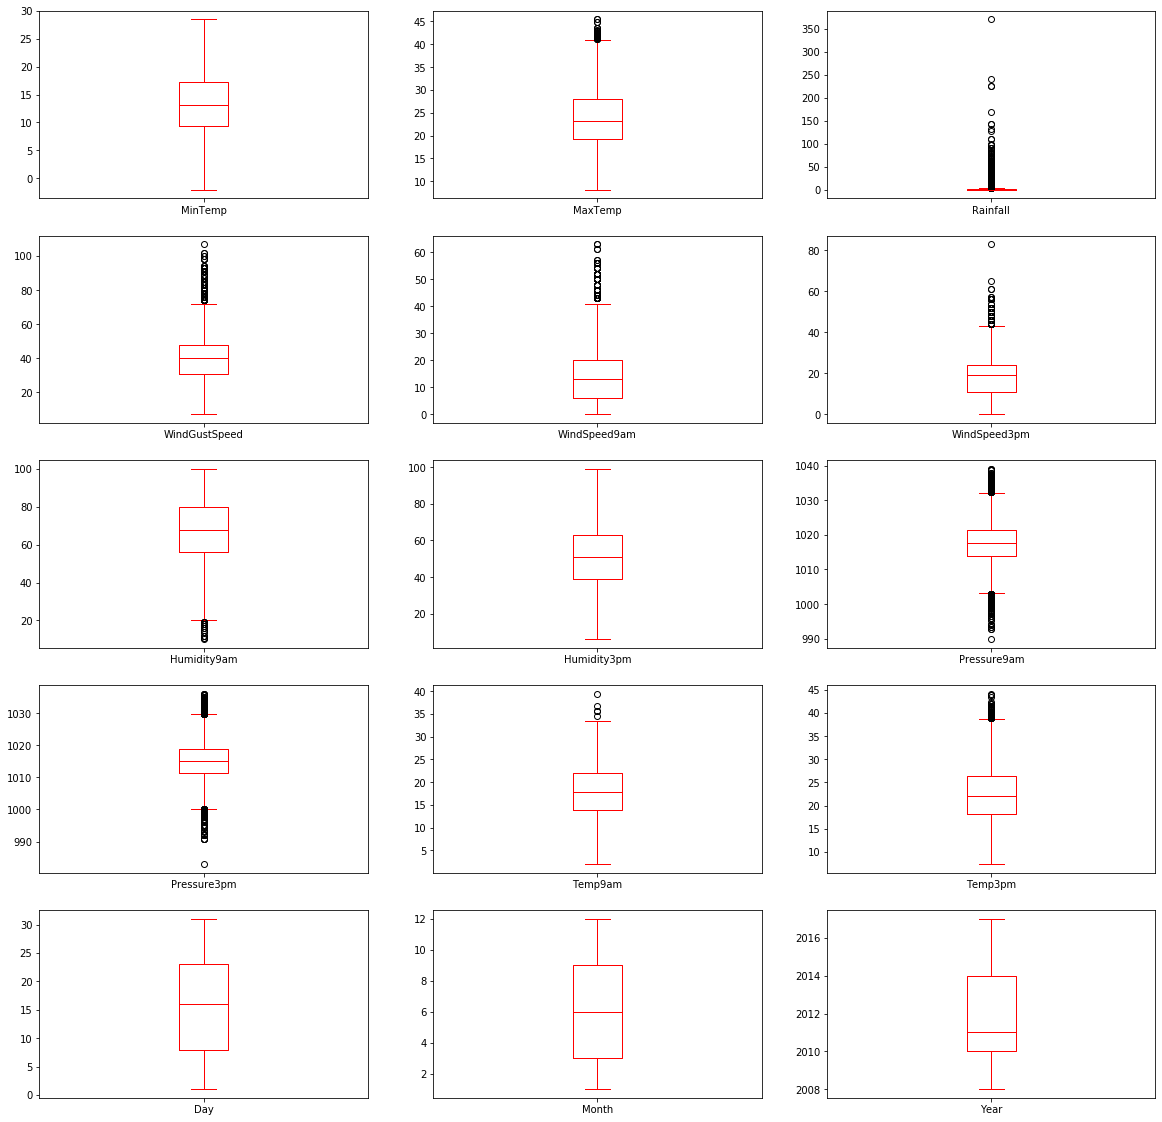

In [437]:
# Viewing the data using Boxplot
dfw.plot(kind='box',subplots=True,layout=(5,3),color='red',figsize=(20,20))
plt.show()

There is a Outliers present in data, We will remove the Outlier later

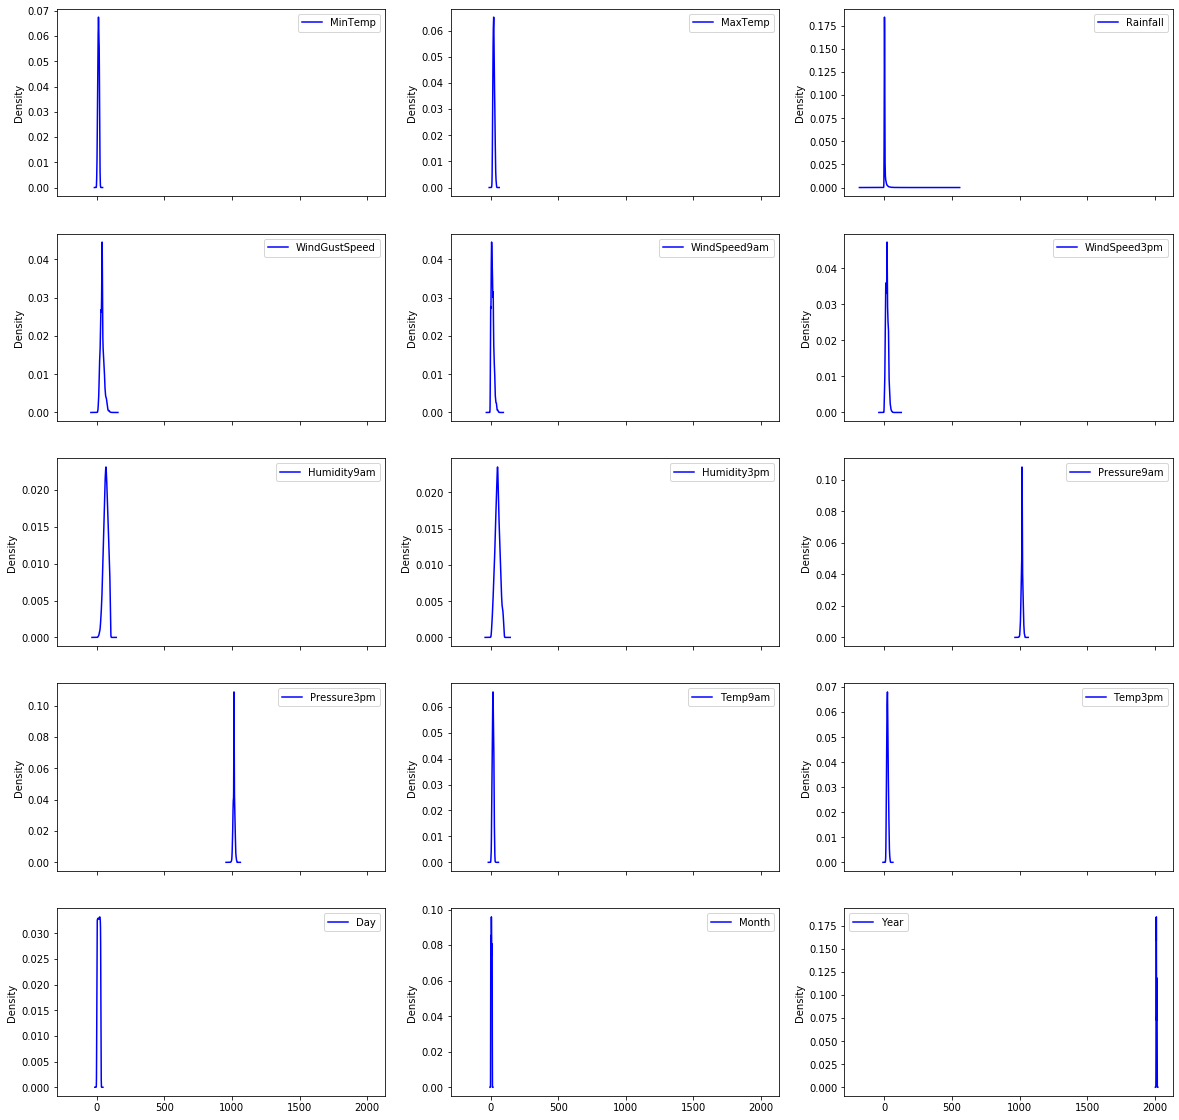

In [438]:
# Viewing the Kernel density Estimator
dfw.plot(kind='kde',subplots=True,layout=(5,3),color='blue',figsize=(20,20))
plt.show()

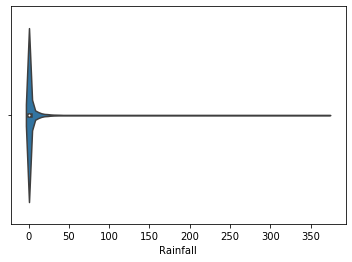

In [439]:
# Viewing the Rainfall using Violinplot
sns.violinplot(dfw['Rainfall'])
plt.show()

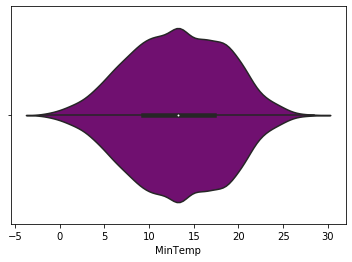

In [440]:
# Viewing the MinTemp using the Violinplot
sns.violinplot(dfw['MinTemp'],color='purple')

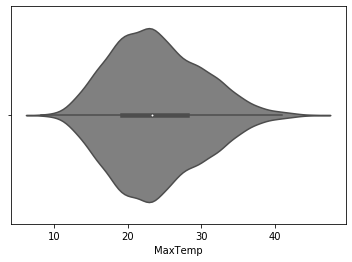

In [441]:
# Viewing the MaxTemp using the Violinplot
sns.violinplot(dfw['MaxTemp'],color='Grey')

In [442]:
# Checking the unique in Location
dfw['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


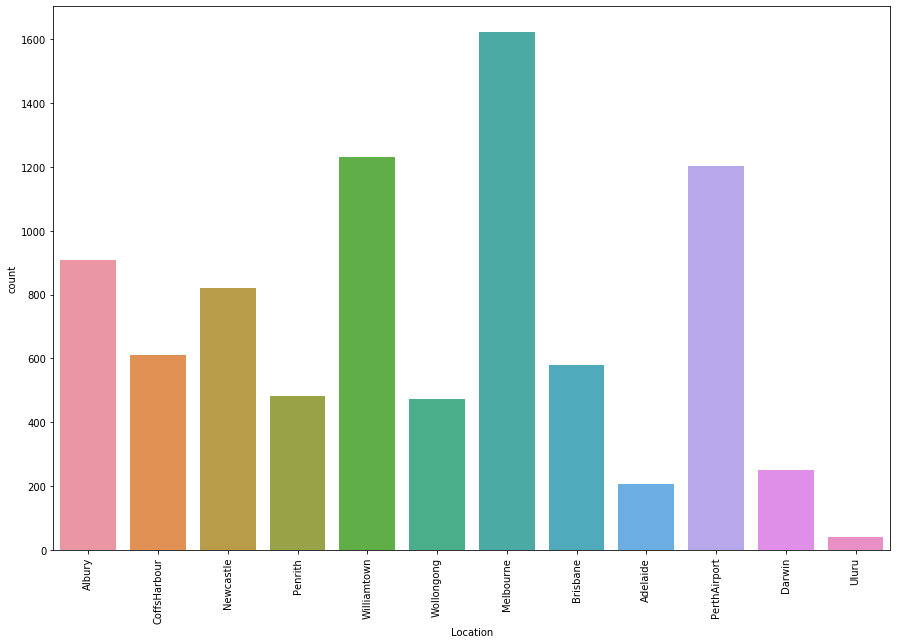

In [443]:
# Viewing the Location count using countplot
plt.figure(figsize=(15,10))
print(dfw['Location'].value_counts())
sns.countplot(dfw['Location'])
plt.xticks(rotation=90)
plt.show()

Melbourne count is high as compared with other Location.

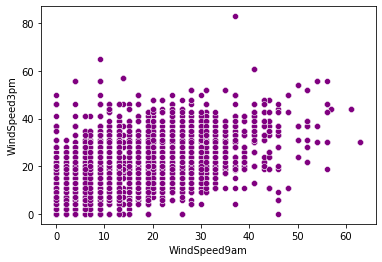

In [444]:
# Viewing the windspeed at 9am and 3pm using scatterplot
sns.scatterplot(dfw['WindSpeed9am'],dfw['WindSpeed3pm'],color='purple')
plt.show()

WindSpeed keeps increasing after 9am

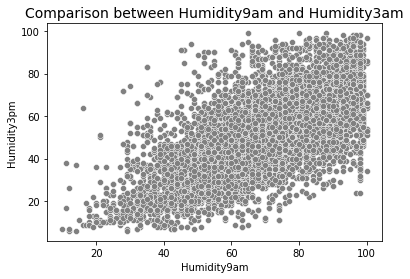

In [445]:
# Viewing the Humidity
sns.scatterplot(dfw['Humidity9am'],dfw['Humidity3pm'],color='grey')
plt.title("Comparison between Humidity9am and Humidity3am",fontsize=14)
plt.show()

Humidity3pm is increasing than Humidity9am

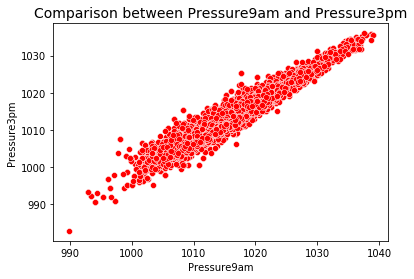

In [446]:
# Viewing the Pressure
sns.scatterplot(dfw['Pressure9am'],dfw['Pressure3pm'],color='red')
plt.title("Comparison between Pressure9am and Pressure3pm",fontsize=14)
plt.show()

The pressure is keep increasing at 3pm.

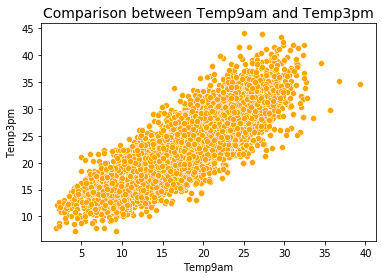

In [447]:
sns.scatterplot(dfw['Temp9am'],dfw['Temp3pm'],color='orange')
plt.title("Comparison between Temp9am and Temp3pm",fontsize=14)
plt.show()

There is drastic increase in temperature at 3pm.

2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: Year, dtype: int64


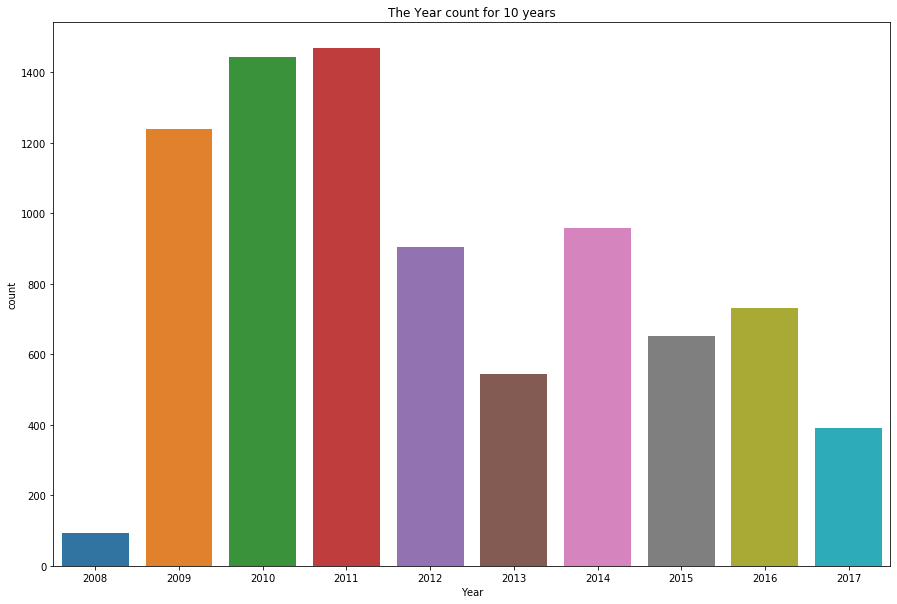

In [448]:
# Viewing the Year count
plt.figure(figsize=(15,10))
print(dfw['Year'].value_counts())
sns.countplot(dfw['Year'])
plt.title("The Year count for 10 years")
plt.show()

In 2011 the count is high, there means the rainfall occur mostly in 2011, In 2010 only a slight difference between 2010 and 2011. In 2008 the count is very less.

In [449]:
# Checking the unique value in Rain Today
dfw['RainToday'].value_counts()

No     6435
Yes    1990
Name: RainToday, dtype: int64

No     6435
Yes    1990
Name: RainToday, dtype: int64


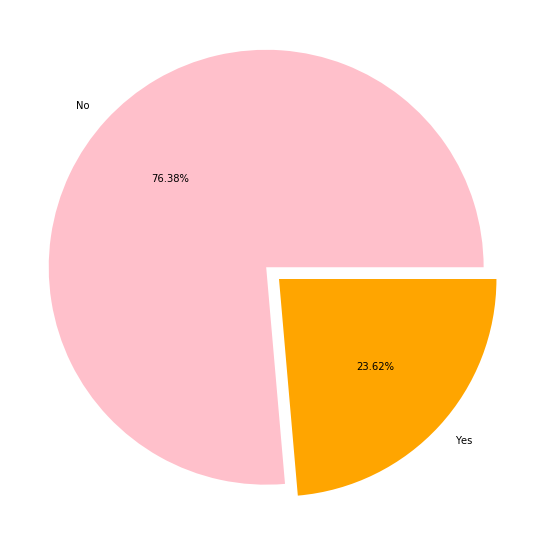

In [450]:
# Viewing the count that it will Rain Today or not using Pie chart
print(dfw['RainToday'].value_counts())
label='No','Yes'
figure,axes=plt.subplots(figsize=(10,10))
axes.pie(dfw['RainToday'].value_counts(),labels=label,autopct='%1.2f%%',colors=['pink','orange'],explode=(0.08,0))
plt.show()

There is less chance that the rain will fall today. Majority of the counts shows that it will not rain today

In [451]:
# Checking the unique value in Rain Tomorrow
dfw['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


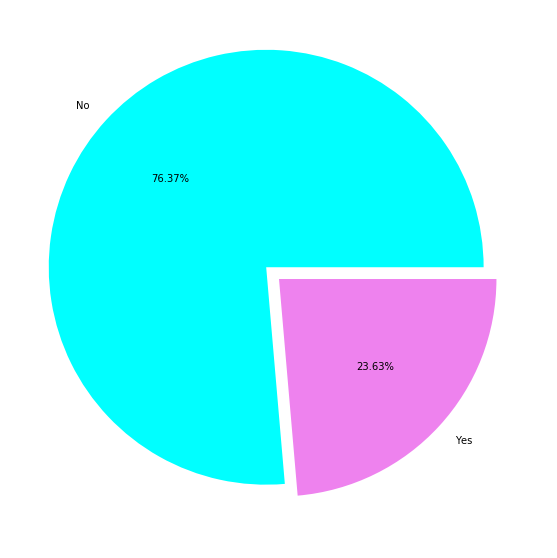

In [452]:
# Viewing the count that it will Rain Tomorrow or not using Pie chart
print(dfw['RainTomorrow'].value_counts())
label='No','Yes'
figure,axes=plt.subplots(figsize=(10,10))
axes.pie(dfw['RainTomorrow'].value_counts(),labels=label,autopct='%1.2f%%',colors=['aqua','violet'],explode=(0.08,0))
plt.show()

Majority of the count shows that it will not rain tomorrow, there is very less chance that it will rain tomorrow

In [453]:
dfw['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


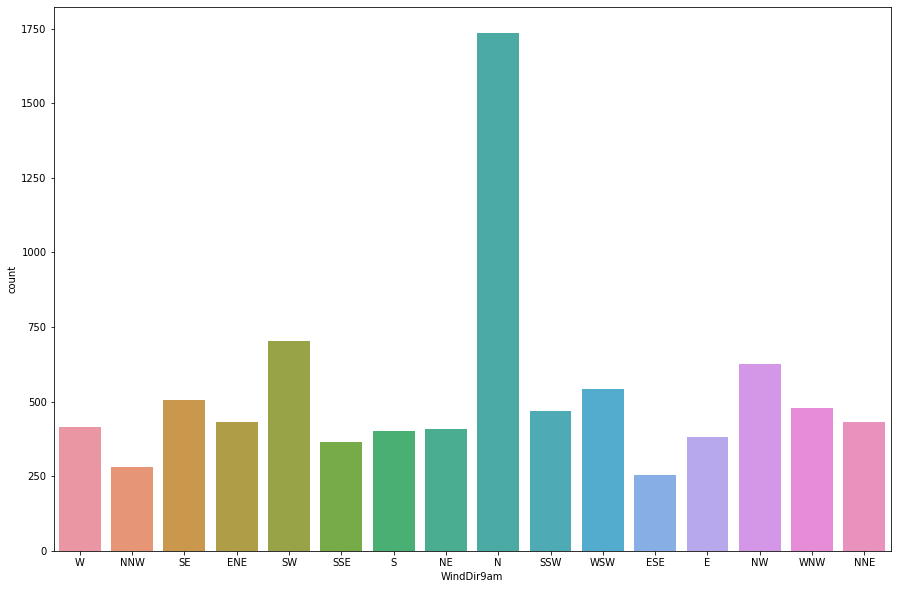

In [454]:
# Viewing the count of Wind direction at 9am
plt.figure(figsize=(15,10))
print(dfw['WindDir9am'].value_counts())
sns.countplot(dfw['WindDir9am'])
plt.show()

In North(N) the wind direction at 9am is high as compared with other direction.

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


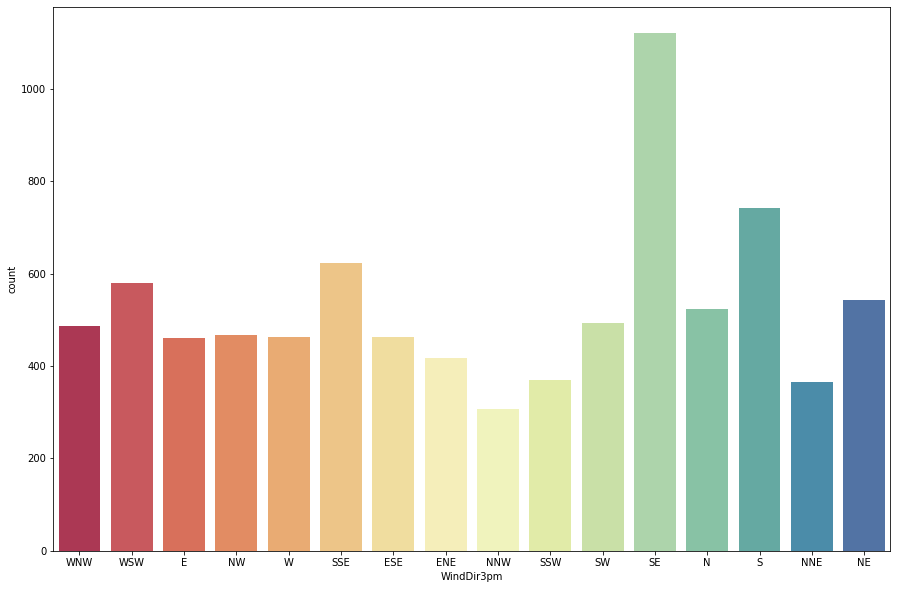

In [455]:
# Viewing the count of Wind direction at 3pm
plt.figure(figsize=(15,10))
print(dfw['WindDir3pm'].value_counts())
sns.countplot(dfw['WindDir3pm'],palette='Spectral')
plt.show()

In SE the count is too high the wind direction at 3pm is high in the SE Direction

In [456]:
dfw['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


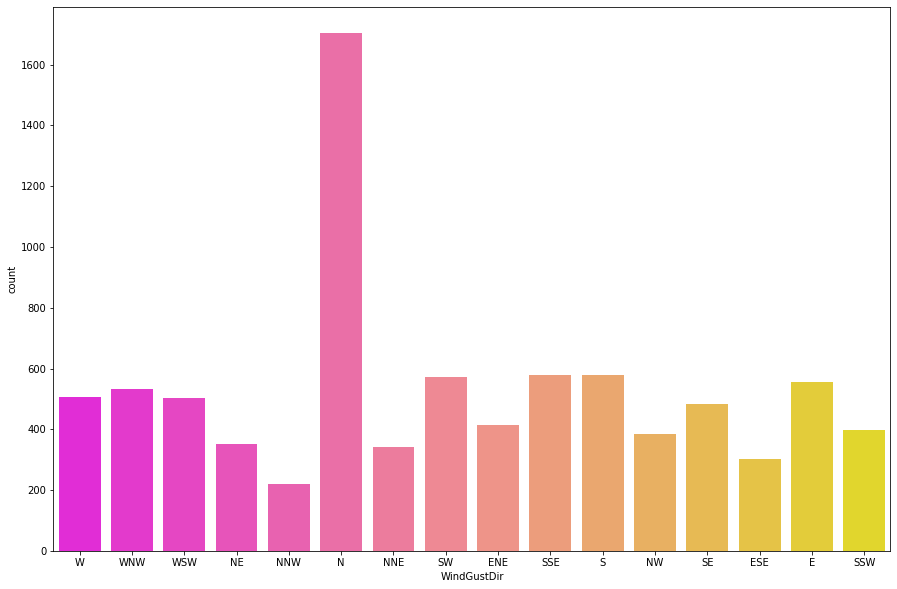

In [457]:
# Viewing the count of Wind Gust Direction
plt.figure(figsize=(15,10))
print(dfw['WindGustDir'].value_counts())
sns.countplot(dfw['WindGustDir'],palette='spring')
plt.show()

In N the WindGustDirection is high as compared with other WindGustDirection

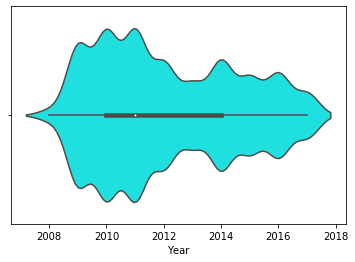

In [458]:
# Viewing the year using violinplot
sns.violinplot(dfw['Year'],color='aqua')
plt.show()

In the 2010 and 2011 the high rainfall

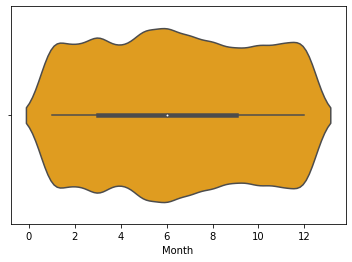

In [459]:
sns.violinplot(dfw['Month'],color='orange')
plt.show()

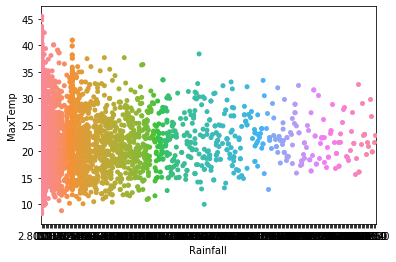

In [460]:
sns.stripplot(dfw['Rainfall'],dfw['MaxTemp'])

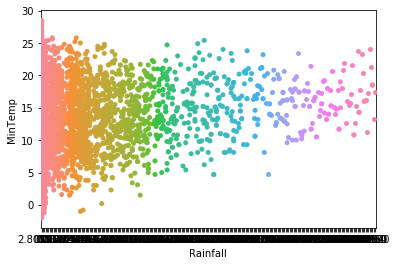

In [461]:
sns.stripplot(dfw['Rainfall'],dfw['MinTemp'])

In [462]:
numerical_data=[]
for i in dfw.dtypes.index:
    if dfw.dtypes[i]!='object':
        numerical_data.append(i)
print(numerical_data)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


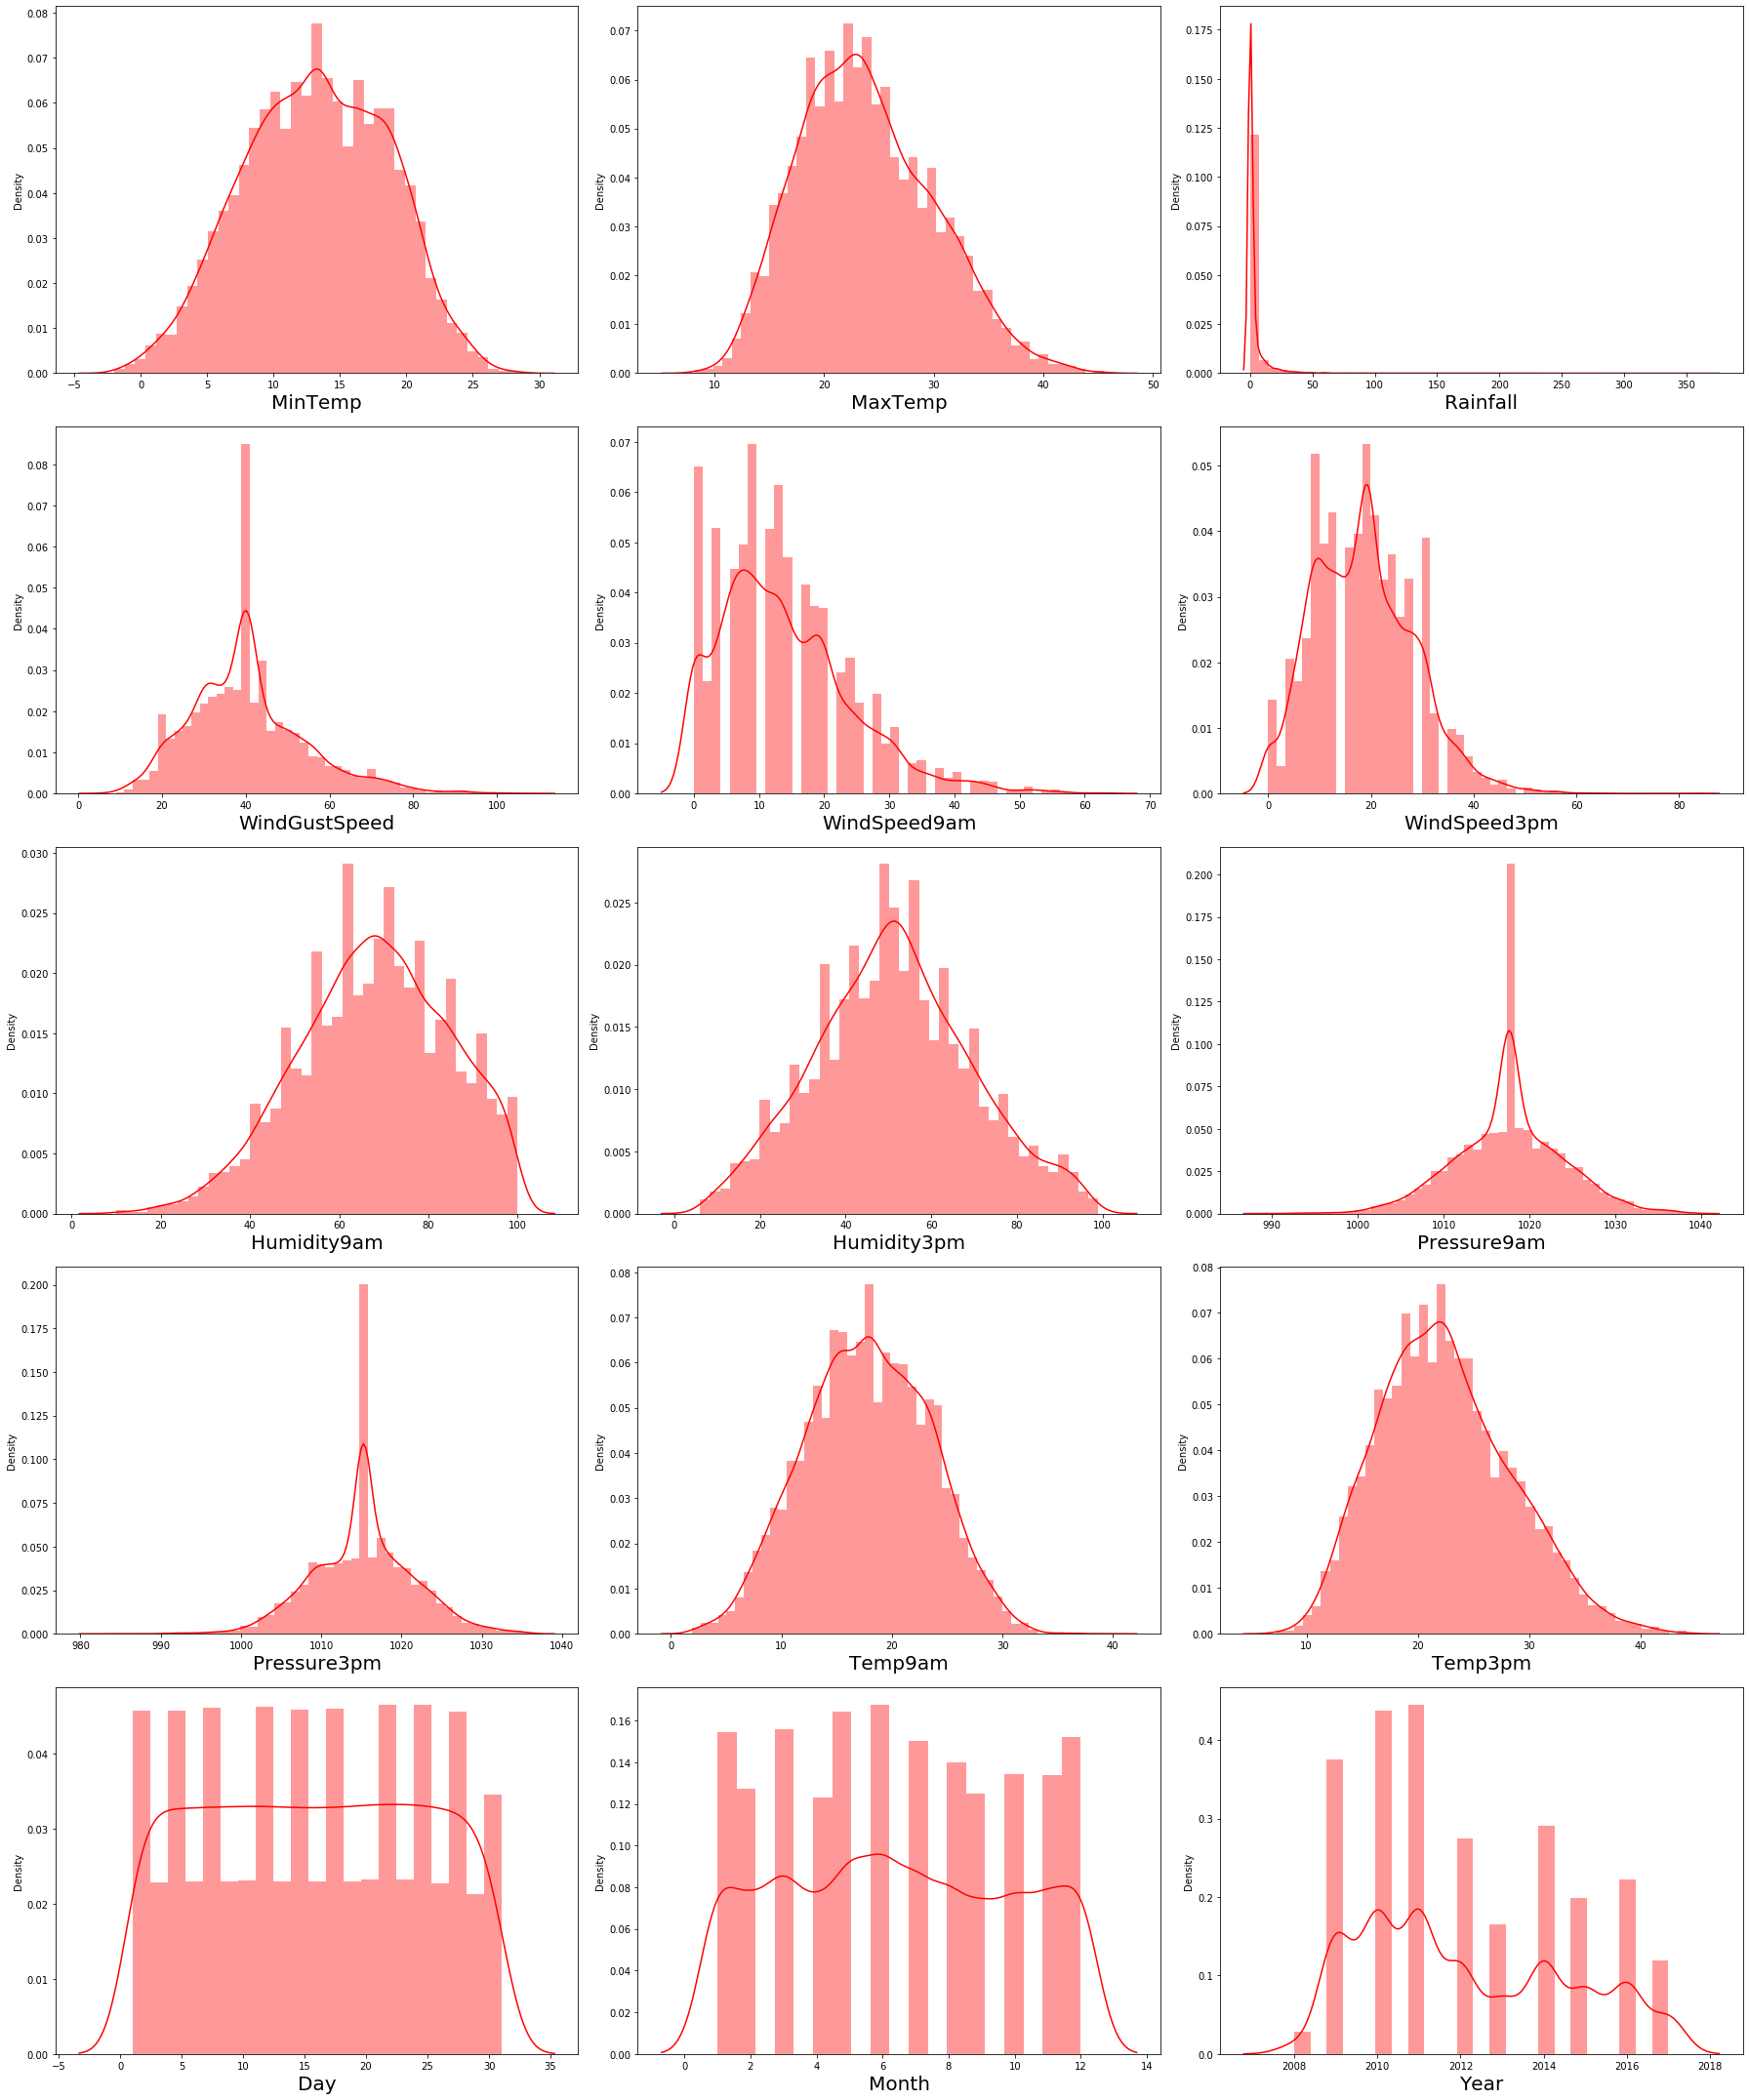

In [463]:
# Viewing Distribution plot for Each features
plt.figure(figsize=(25,30))
plotnumber=1
for i in numerical_data:
    axes=plt.subplot(5,3,plotnumber)
    if plotnumber<=15:
        sns.distplot(dfw[i],color='red')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

MinTemp, MaxTemp, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity9pm, Temp9am, Temp3pm is normally Distributed

In [464]:
dfw_corr=dfw.corr()
dfw_corr

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.717522  0.087684       0.230058      0.136872   
MaxTemp        0.717522  1.000000 -0.087451       0.139998      0.013314   
Rainfall       0.087684 -0.087451  1.000000       0.086000      0.050631   
WindGustSpeed  0.230058  0.139998  0.086000       1.000000      0.600198   
WindSpeed9am   0.136872  0.013314  0.050631       0.600198      1.000000   
WindSpeed3pm   0.178349  0.088172  0.024791       0.634939      0.560660   
Humidity9am   -0.130731 -0.390976  0.228800      -0.269593     -0.358391   
Humidity3pm    0.079048 -0.421879  0.235444      -0.091860     -0.110587   
Pressure9am   -0.429432 -0.325721 -0.072668      -0.407139     -0.174679   
Pressure3pm   -0.422991 -0.403258 -0.033649      -0.372651     -0.138454   
Temp9am        0.887119  0.866039 -0.007083       0.202298      0.109798   
Temp3pm        0.685520  0.974506 -0.090687       0.102199     -0.002606   
Day            0.009446  0.015608 -0.013760      -0.002876     -0.003067   
Month         -0.245854 -0.163253 -0.012244       0.051968      0.038427   
Year           0.044123  0.119772  0.006435      -0.042402     -0.088489   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.178349    -0.130731     0.079048    -0.429432   
MaxTemp            0.088172    -0.390976    -0.421879    -0.325721   
Rainfall           0.024791     0.228800     0.235444    -0.072668   
WindGustSpeed      0.634939    -0.269593    -0.091860    -0.407139   
WindSpeed9am       0.560660    -0.358391    -0.110587    -0.174679   
WindSpeed3pm       1.000000    -0.250953    -0.091004    -0.251697   
Humidity9am       -0.250953     1.000000     0.633291     0.142374   
Humidity3pm       -0.091004     0.633291     1.000000     0.001629   
Pressure9am       -0.251697     0.142374     0.001629     1.000000   
Pressure3pm       -0.207544     0.173415     0.070369     0.961428   
Temp9am            0.184188    -0.378344    -0.130414    -0.410849   
Temp3pm            0.066087    -0.382401    -0.491485    -0.283412   
Day               -0.008957     0.003799     0.012512    -0.015974   
Month              0.049483    -0.115530    -0.074256     0.007156   
Year              -0.051466     0.099717    -0.028920     0.030558   

               Pressure3pm   Temp9am   Temp3pm       Day     Month      Year  
MinTemp          -0.422991  0.887119  0.685520  0.009446 -0.245854  0.044123  
MaxTemp          -0.403258  0.866039  0.974506  0.015608 -0.163253  0.119772  
Rainfall         -0.033649 -0.007083 -0.090687 -0.013760 -0.012244  0.006435  
WindGustSpeed    -0.372651  0.202298  0.102199 -0.002876  0.051968 -0.042402  
WindSpeed9am     -0.138454  0.109798 -0.002606 -0.003067  0.038427 -0.088489  
WindSpeed3pm     -0.207544  0.184188  0.066087 -0.008957  0.049483 -0.051466  
Humidity9am       0.173415 -0.378344 -0.382401  0.003799 -0.115530  0.099717  
Humidity3pm       0.070369 -0.130414 -0.491485  0.012512 -0.074256 -0.028920  
Pressure9am       0.961428 -0.410849 -0.283412 -0.015974  0.007156  0.030558  
Pressure3pm       1.000000 -0.439378 -0.369953 -0.011689  0.002074  0.014002  
Temp9am          -0.439378  1.000000  0.834165  0.010978 -0.165236  0.088735  
Temp3pm          -0.369953  0.834165  1.000000  0.012951 -0.176218  0.132554  
Day              -0.011689  0.010978  0.012951  1.000000  0.004386 -0.003836  
Month             0.002074 -0.165236 -0.176218  0.004386  1.000000 -0.090394  
Year              0.014002  0.088735  0.132554 -0.003836 -0.090394  1.000000

Most of the features are negative correlation

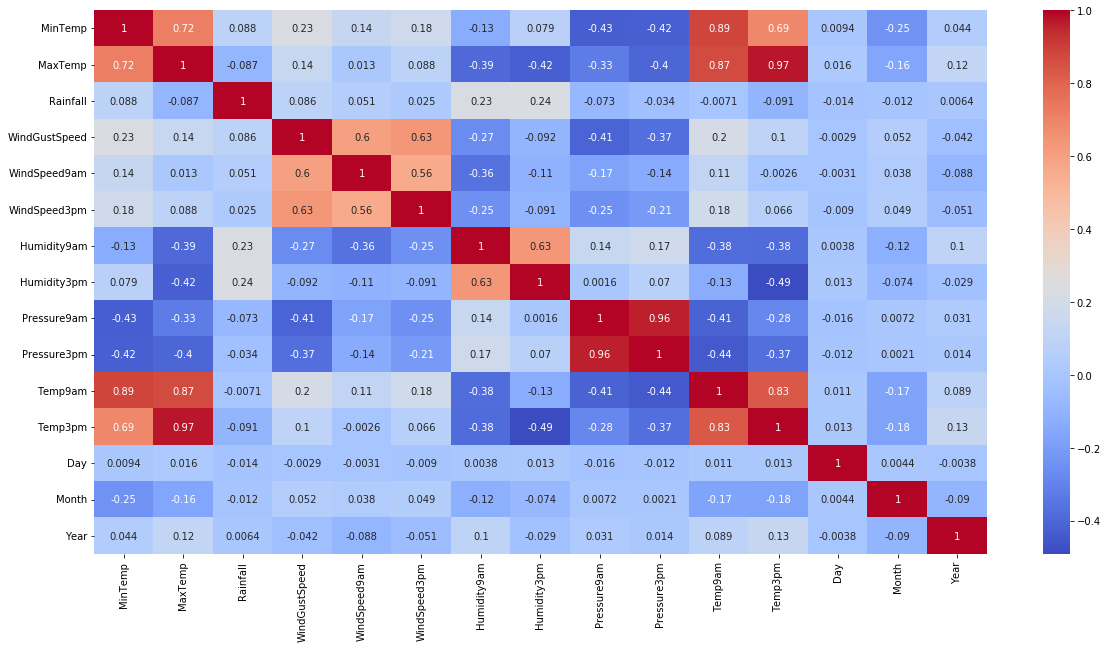

In [465]:
plt.figure(figsize=(20,10))
sns.heatmap(dfw.corr(),annot=True,cmap='coolwarm')
plt.show()

WindSpeed , Pressure, MaxTemp are high positive correlated.

# Convert Categorical data to Numerical Data

# Ordinal Encoder

In [466]:
from sklearn.preprocessing import OrdinalEncoder

In [467]:
OE=OrdinalEncoder()

for i in dfw.columns:
    if dfw.dtypes[i]=='object':
        dfw[i]=OE.fit_transform(dfw[i].values.reshape(-1,1))

In [468]:
dfw

Location  MinTemp    MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0          1.0     13.4  22.900000       0.6         13.0      44.000000   
1          1.0      7.4  25.100000       0.0         14.0      44.000000   
2          1.0     12.9  25.700000       0.0         15.0      46.000000   
3          1.0      9.2  28.000000       0.0          4.0      24.000000   
4          1.0     17.5  32.300000       1.0         13.0      41.000000   
...        ...      ...        ...       ...          ...            ...   
8420       9.0      2.8  23.400000       0.0          0.0      31.000000   
8421       9.0      3.6  25.300000       0.0          6.0      22.000000   
8422       9.0      5.4  26.900000       0.0          3.0      37.000000   
8423       9.0      7.8  27.000000       0.0          9.0      28.000000   
8424       9.0     14.9  23.859976       0.0          3.0      40.174469   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0           13.0        14.0          20.0          24.0  ...         22.0   
1            6.0        15.0           4.0          22.0  ...         25.0   
2           13.0        15.0          19.0          26.0  ...         30.0   
3            9.0         0.0          11.0           9.0  ...         16.0   
4            1.0         7.0           7.0          20.0  ...         33.0   
...          ...         ...           ...           ...  ...          ...   
8420         9.0         1.0          13.0          11.0  ...         24.0   
8421         9.0         3.0          13.0           9.0  ...         21.0   
8422         9.0        14.0           9.0           9.0  ...         24.0   
8423        10.0         3.0          13.0           7.0  ...         24.0   
8424         2.0         2.0          17.0          17.0  ...         36.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0          1007.7       1007.1     16.9     21.8        0.0           0.0   
1          1010.6       1007.8     17.2     24.3        0.0           0.0   
2          1007.6       1008.7     21.0     23.2        0.0           0.0   
3          1017.6       1012.8     18.1     26.5        0.0           0.0   
4          1010.8       1006.0     17.8     29.7        0.0           0.0   
...           ...          ...      ...      ...        ...           ...   
8420       1024.6       1020.3     10.1     22.4        0.0           0.0   
8421       1023.5       1019.1     10.9     24.5        0.0           0.0   
8422       1021.0       1016.8     12.5     26.1        0.0           0.0   
8423       1019.4       1016.5     15.1     26.0        0.0           0.0   
8424       1020.2       1017.9     15.0     20.9        0.0           0.0   

      Day  Month  Year  
0       1     12  2008  
1       2     12  2008  
2       3     12  2008  
3       4     12  2008  
4       5     12  2008  
...   ...    ...   ...  
8420   21      6  2017  
8421   22      6  2017  
8422   23      6  2017  
8423   24      6  2017  
8424   25      6  2017  

[8425 rows x 21 columns]

We have Successfully converted all the categorical data to Numerical data

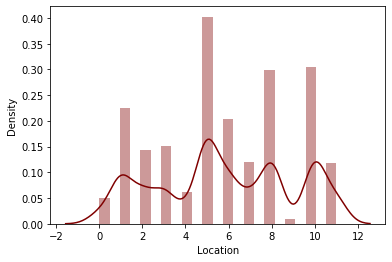

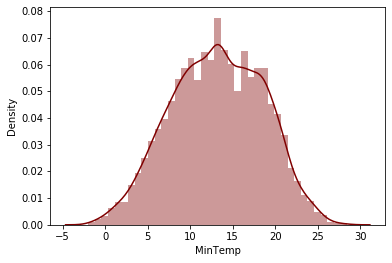

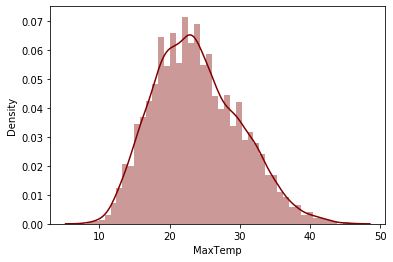

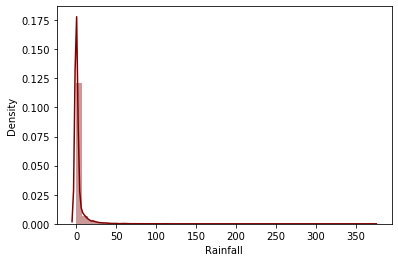

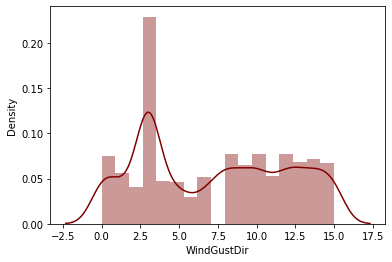

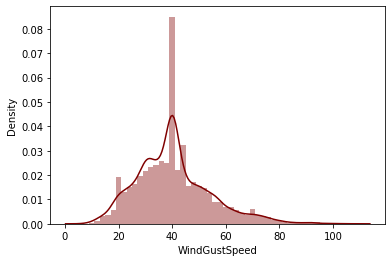

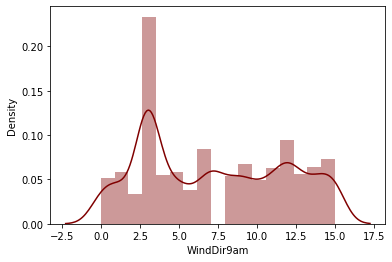

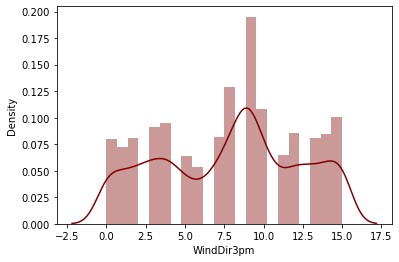

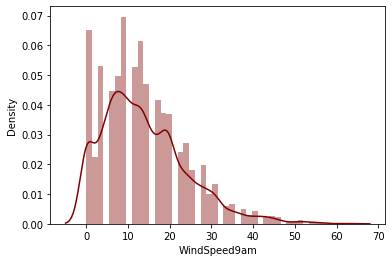

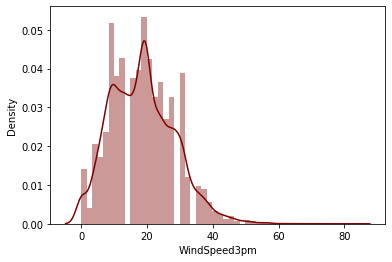

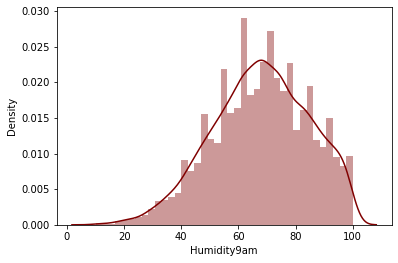

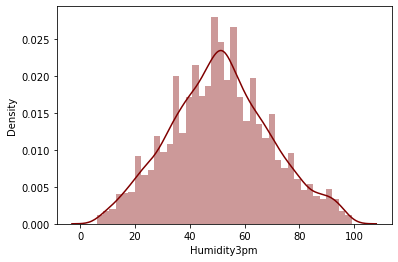

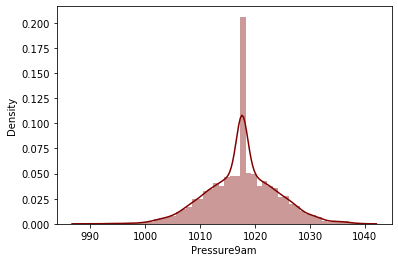

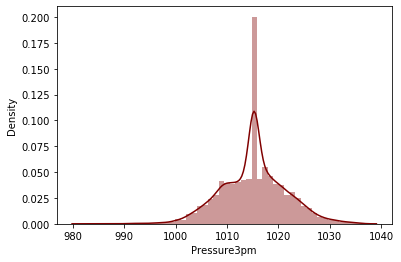

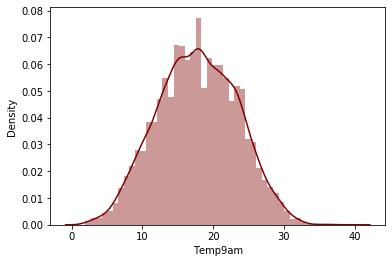

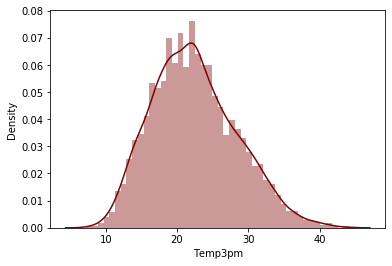

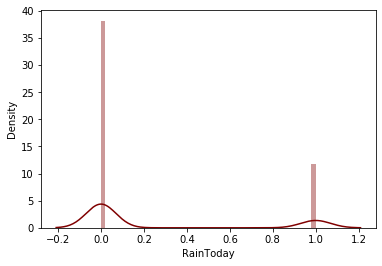

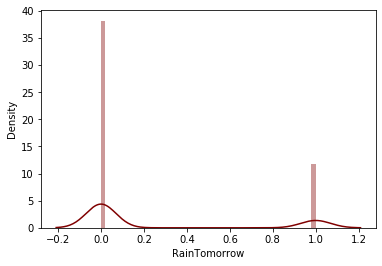

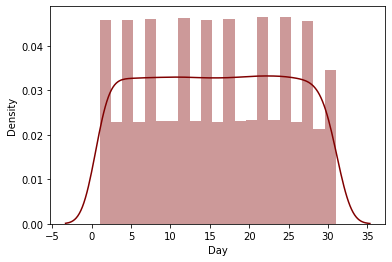

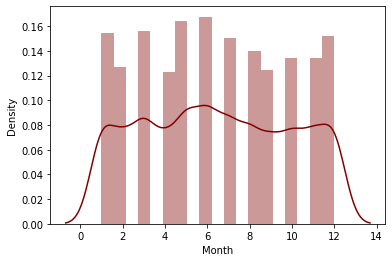

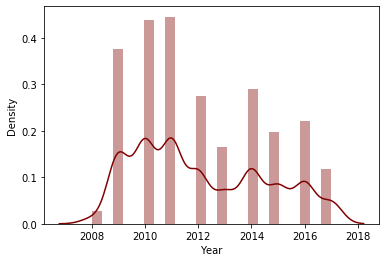

In [469]:
# Viewing the distribution plot for all features
for i in dfw:
    sns.distplot(dfw[i],color='maroon')
    plt.show()

In [470]:
dfw_corr=dfw.corr()
dfw_corr

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  \
Location       1.000000  0.116531  0.064268  0.007693    -0.035408   
MinTemp        0.116531  1.000000  0.717522  0.087684    -0.145316   
MaxTemp        0.064268  0.717522  1.000000 -0.087451    -0.224670   
Rainfall       0.007693  0.087684 -0.087451  1.000000     0.038812   
WindGustDir   -0.035408 -0.145316 -0.224670  0.038812     1.000000   
WindGustSpeed  0.231396  0.230058  0.139998  0.086000     0.016591   
WindDir9am    -0.027103 -0.041650 -0.214119  0.093821     0.403562   
WindDir3pm    -0.027736 -0.147166 -0.180622  0.038560     0.505799   
WindSpeed9am   0.221378  0.136872  0.013314  0.050631     0.025399   
WindSpeed3pm   0.231801  0.178349  0.088172  0.024791     0.094623   
Humidity9am    0.005662 -0.130731 -0.390976  0.228800     0.036467   
Humidity3pm    0.055790  0.079048 -0.421879  0.235444     0.053567   
Pressure9am   -0.032261 -0.429432 -0.325721 -0.072668    -0.109704   
Pressure3pm   -0.020574 -0.422991 -0.403258 -0.033649    -0.024997   
Temp9am        0.118051  0.887119  0.866039 -0.007083    -0.176318   
Temp3pm        0.060570  0.685520  0.974506 -0.090687    -0.238856   
RainToday      0.003071  0.064789 -0.224883  0.461106     0.125188   
RainTomorrow   0.002824  0.092942 -0.152886  0.220021     0.051832   
Day           -0.002019  0.009446  0.015608 -0.013760     0.015683   
Month         -0.082407 -0.245854 -0.163253 -0.012244     0.034823   
Year           0.486405  0.044123  0.119772  0.006435    -0.088340   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
Location            0.231396   -0.027103   -0.027736      0.221378   
MinTemp             0.230058   -0.041650   -0.147166      0.136872   
MaxTemp             0.139998   -0.214119   -0.180622      0.013314   
Rainfall            0.086000    0.093821    0.038560      0.050631   
WindGustDir         0.016591    0.403562    0.505799      0.025399   
WindGustSpeed       1.000000   -0.072058    0.071235      0.600198   
WindDir9am         -0.072058    1.000000    0.249527      0.054272   
WindDir3pm          0.071235    0.249527    1.000000      0.025973   
WindSpeed9am        0.600198    0.054272    0.025973      1.000000   
WindSpeed3pm        0.634939    0.047116    0.068799      0.560660   
Humidity9am        -0.269593    0.025604   -0.010312     -0.358391   
Humidity3pm        -0.091860    0.124556   -0.012167     -0.110587   
Pressure9am        -0.407139   -0.011024   -0.136517     -0.174679   
Pressure3pm        -0.372651    0.073446   -0.043681     -0.138454   
Temp9am             0.202298   -0.103111   -0.165072      0.109798   
Temp3pm             0.102199   -0.221634   -0.194463     -0.002606   
RainToday           0.076822    0.157324    0.100125      0.035531   
RainTomorrow        0.190127    0.032860    0.008918      0.068285   
Day                -0.002876   -0.015154    0.003089     -0.003067   
Month               0.051968    0.012544    0.029384      0.038427   
Year               -0.042402   -0.014498   -0.005812     -0.088489   

               WindSpeed3pm  ...  Humidity3pm  Pressure9am  Pressure3pm  \
Location           0.231801  ...     0.055790    -0.032261    -0.020574   
MinTemp            0.178349  ...     0.079048    -0.429432    -0.422991   
MaxTemp            0.088172  ...    -0.421879    -0.325721    -0.403258   
Rainfall           0.024791  ...     0.235444    -0.072668    -0.033649   
WindGustDir        0.094623  ...     0.053567    -0.109704    -0.024997   
WindGustSpeed      0.634939  ...    -0.091860    -0.407139    -0.372651   
WindDir9am         0.047116  ...     0.124556    -0.011024     0.073446   
WindDir3pm         0.068799  ...    -0.012167    -0.136517    -0.043681   
WindSpeed9am       0.560660  ...    -0.110587    -0.174679    -0.138454   
WindSpeed3pm       1.000000  ...    -0.091004    -0.251697    -0.207544   
Humidity9am       -0.250953  ...     0.633291     0.142374     0.173415   
Humidity3pm       -0.091004  ... 

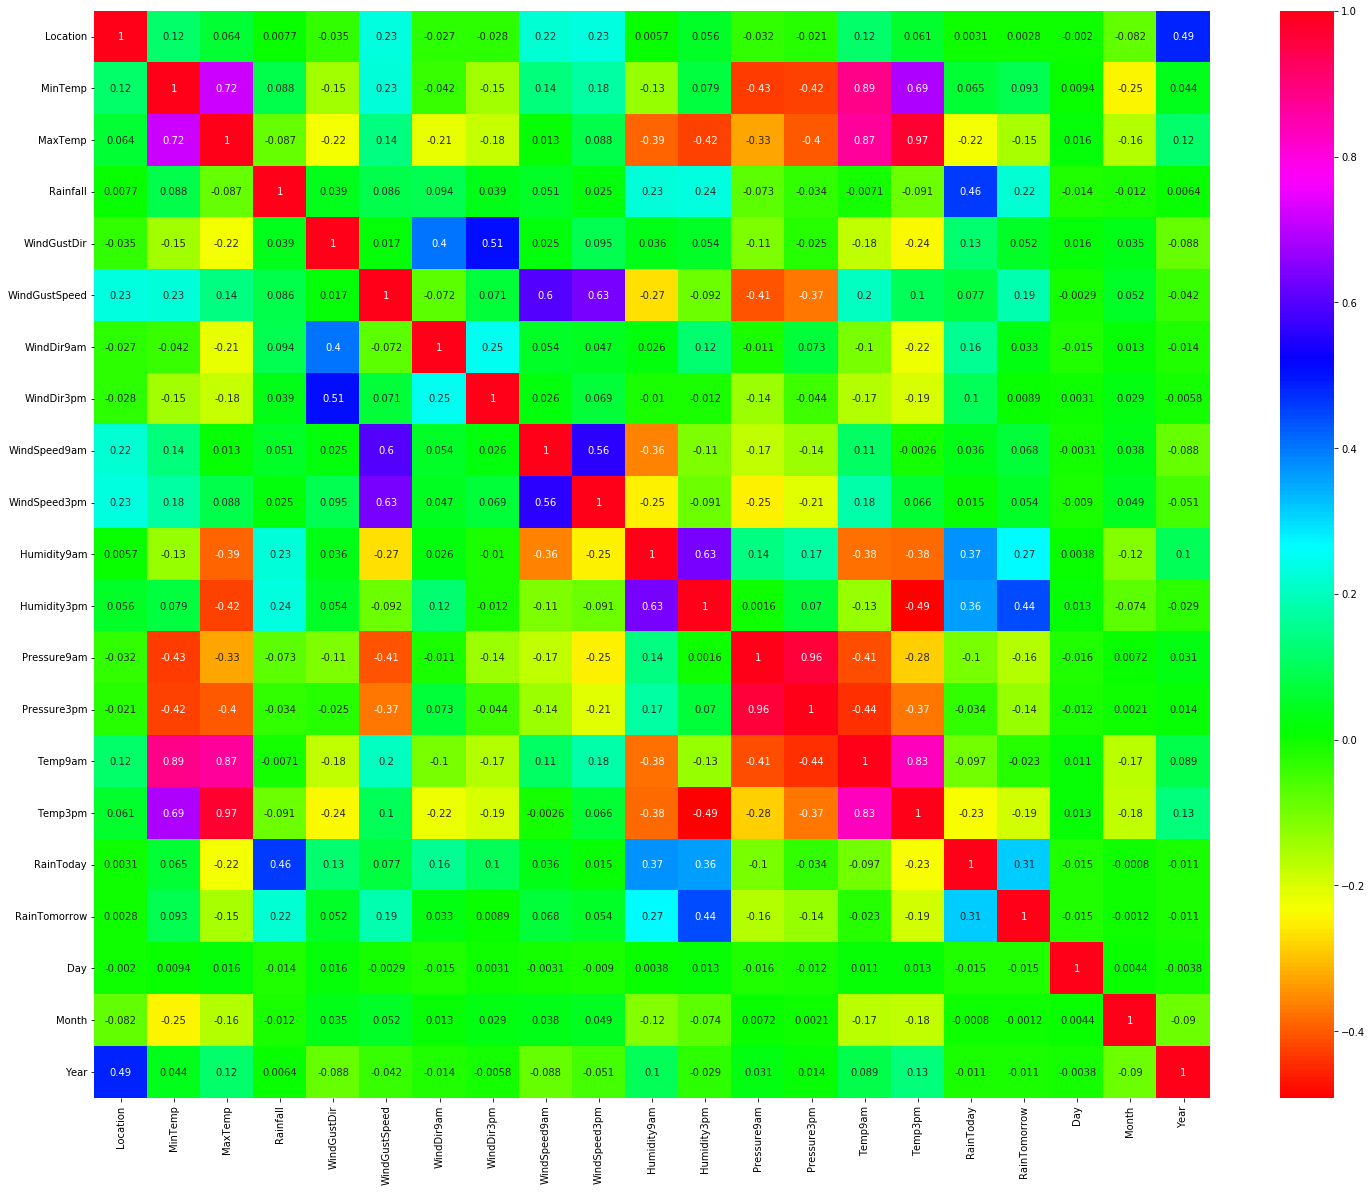

In [471]:
# Viewing the correlation for all Features
plt.figure(figsize=(25,20))
sns.heatmap(dfw.corr(),annot=True,cmap='hsv')
plt.show()

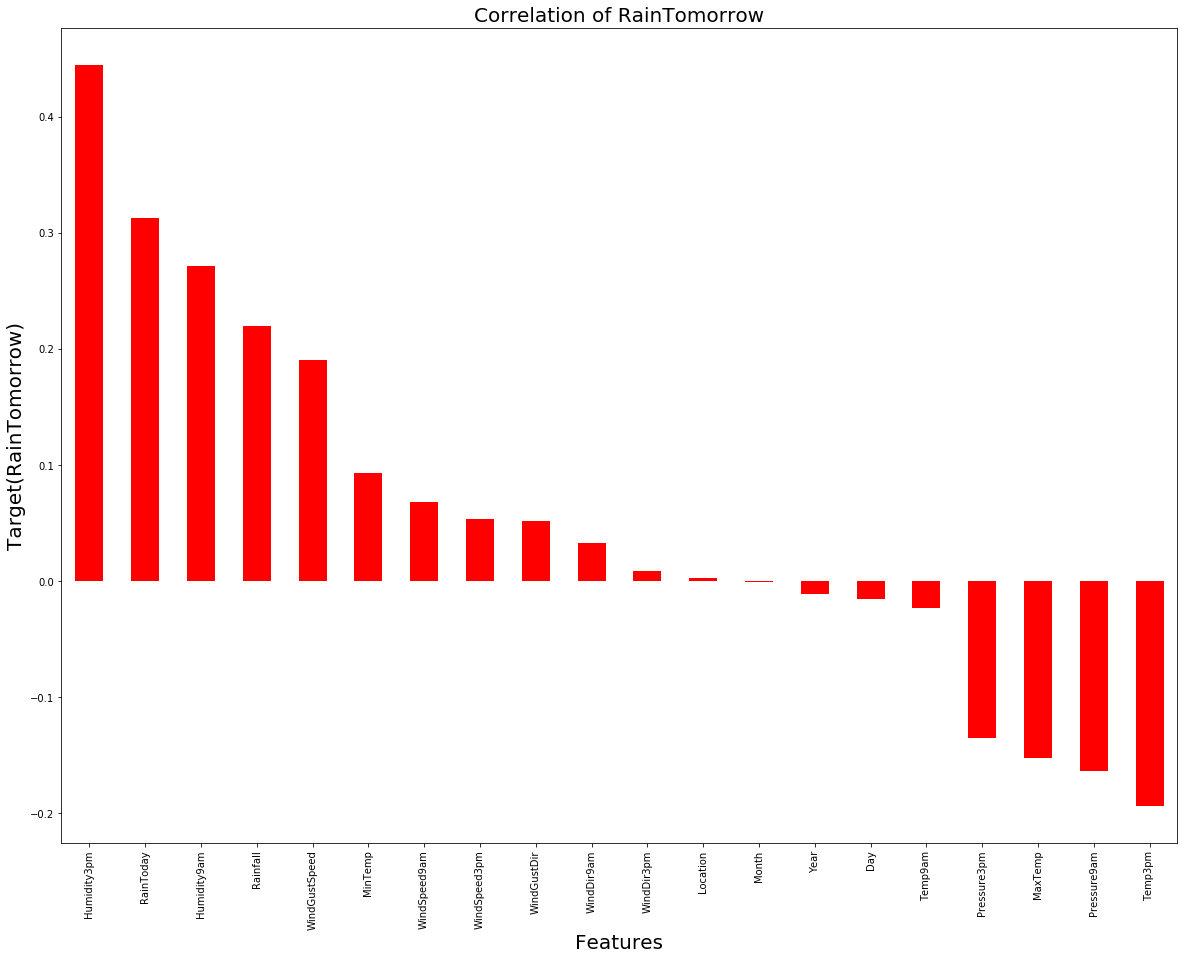

In [472]:
plt.figure(figsize=(20,15))
dfw.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',cmap='hsv')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target(RainTomorrow)',fontsize=20)
plt.title('Correlation of RainTomorrow',fontsize=20)
plt.show()

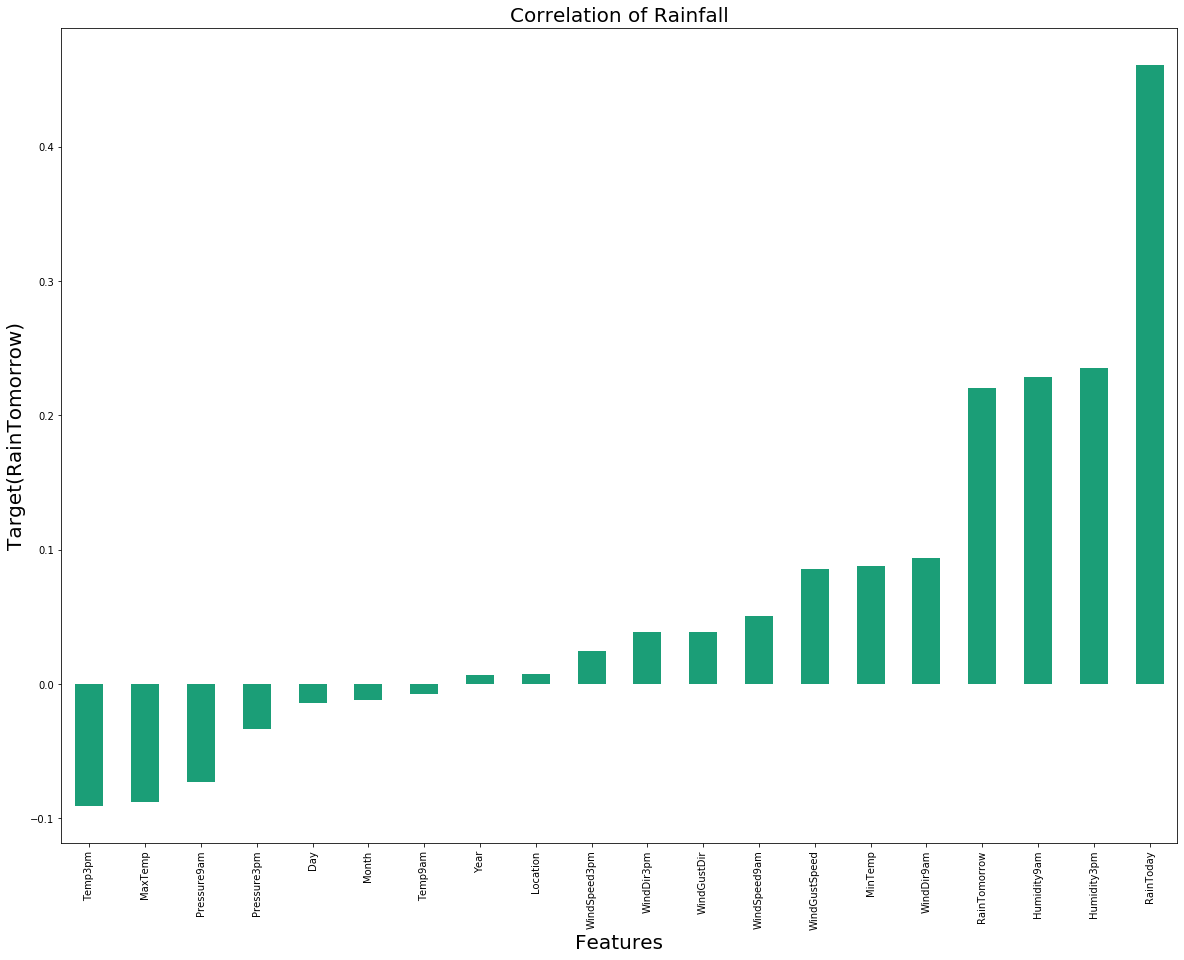

In [473]:
plt.figure(figsize=(20,15))
dfw.corr()['Rainfall'].sort_values(ascending=True).drop(['Rainfall']).plot(kind='bar',cmap='Dark2')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target(RainTomorrow)',fontsize=20)
plt.title('Correlation of Rainfall',fontsize=20)
plt.show()

# Outliers

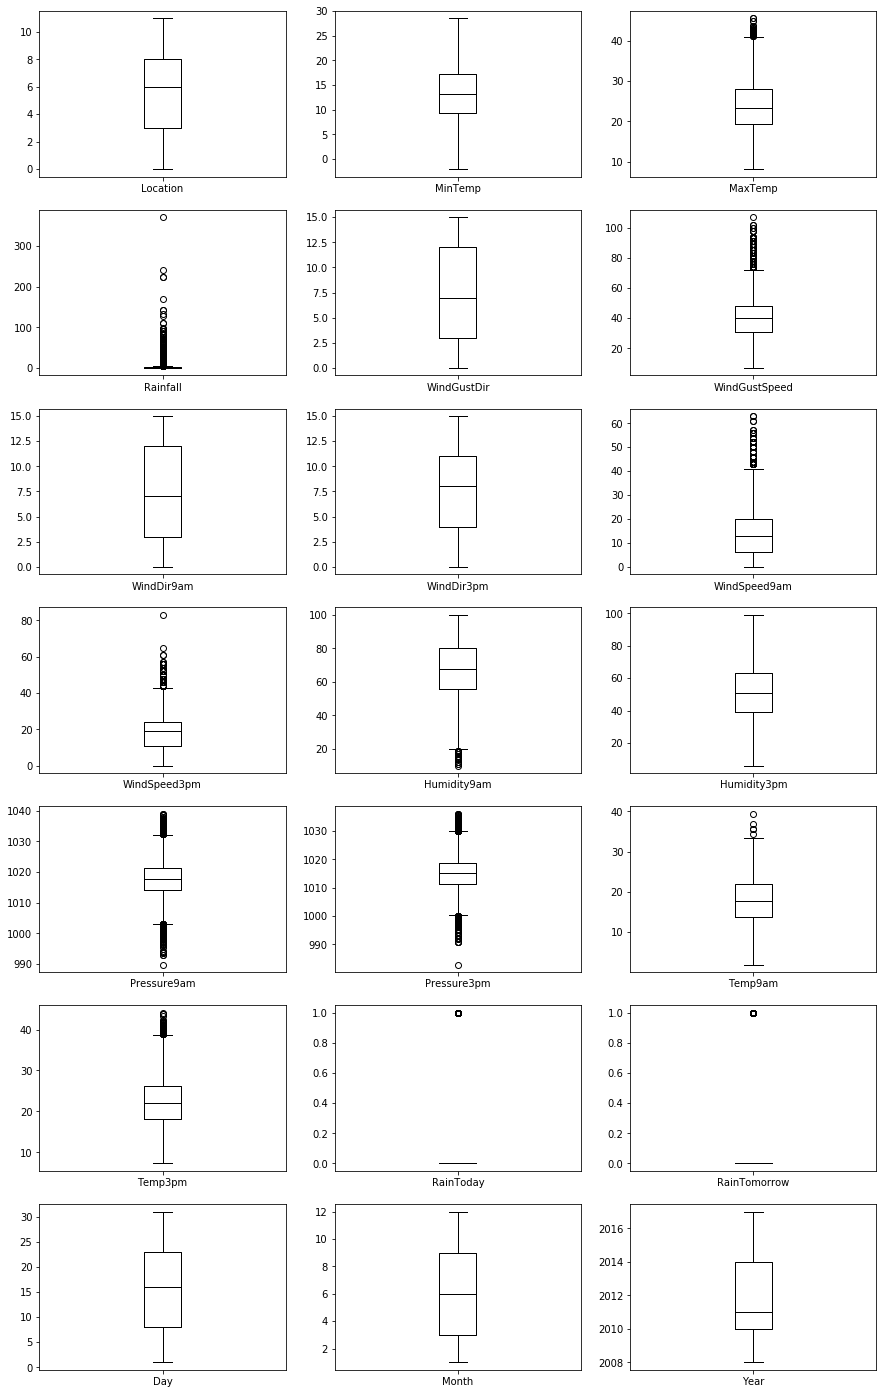

In [474]:
dfw.plot(kind='box',subplots=True, layout=(7,3),figsize=(15,25),color='black')
plt.show()

Outliers are present in MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm,Temp3pm, RainToday,RainTomorrow, Let's remove them using zscore. RainToday,RainTomorrow is a categorical data, so we can ignore them

In [475]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

In [476]:
outliers=dfw[['MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp3pm']]

In [477]:
z=np.abs(zscore(outliers))
z

array([[1.57008852e-01, 2.13985662e-01, 2.77709818e-01, ...,
        1.58400335e+00, 1.30866453e+00, 1.08138052e-01],
       [2.02812062e-01, 2.72188947e-01, 2.77709818e-01, ...,
        1.12188042e+00, 1.19607152e+00, 3.12348332e-01],
       [3.00945038e-01, 2.72188947e-01, 4.22897397e-01, ...,
        1.59993862e+00, 1.05130907e+00, 1.27334323e-01],
       ...,
       [4.97210991e-01, 2.72188947e-01, 2.30446710e-01, ...,
        5.35388013e-01, 2.51552929e-01, 6.15098528e-01],
       [5.13566487e-01, 2.72188947e-01, 8.83790817e-01, ...,
        2.80423638e-01, 2.03298781e-01, 5.98279073e-01],
       [2.90531973e-15, 2.72188947e-01, 0.00000000e+00, ...,
        4.07905825e-01, 4.28484806e-01, 2.59513150e-01]])

In [478]:
dfw_new=dfw[(z<3).all(axis=1)]
dfw_new

Location  MinTemp    MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0          1.0     13.4  22.900000       0.6         13.0      44.000000   
1          1.0      7.4  25.100000       0.0         14.0      44.000000   
2          1.0     12.9  25.700000       0.0         15.0      46.000000   
3          1.0      9.2  28.000000       0.0          4.0      24.000000   
4          1.0     17.5  32.300000       1.0         13.0      41.000000   
...        ...      ...        ...       ...          ...            ...   
8420       9.0      2.8  23.400000       0.0          0.0      31.000000   
8421       9.0      3.6  25.300000       0.0          6.0      22.000000   
8422       9.0      5.4  26.900000       0.0          3.0      37.000000   
8423       9.0      7.8  27.000000       0.0          9.0      28.000000   
8424       9.0     14.9  23.859976       0.0          3.0      40.174469   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0           13.0        14.0          20.0          24.0  ...         22.0   
1            6.0        15.0           4.0          22.0  ...         25.0   
2           13.0        15.0          19.0          26.0  ...         30.0   
3            9.0         0.0          11.0           9.0  ...         16.0   
4            1.0         7.0           7.0          20.0  ...         33.0   
...          ...         ...           ...           ...  ...          ...   
8420         9.0         1.0          13.0          11.0  ...         24.0   
8421         9.0         3.0          13.0           9.0  ...         21.0   
8422         9.0        14.0           9.0           9.0  ...         24.0   
8423        10.0         3.0          13.0           7.0  ...         24.0   
8424         2.0         2.0          17.0          17.0  ...         36.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0          1007.7       1007.1     16.9     21.8        0.0           0.0   
1          1010.6       1007.8     17.2     24.3        0.0           0.0   
2          1007.6       1008.7     21.0     23.2        0.0           0.0   
3          1017.6       1012.8     18.1     26.5        0.0           0.0   
4          1010.8       1006.0     17.8     29.7        0.0           0.0   
...           ...          ...      ...      ...        ...           ...   
8420       1024.6       1020.3     10.1     22.4        0.0           0.0   
8421       1023.5       1019.1     10.9     24.5        0.0           0.0   
8422       1021.0       1016.8     12.5     26.1        0.0           0.0   
8423       1019.4       1016.5     15.1     26.0        0.0           0.0   
8424       1020.2       1017.9     15.0     20.9        0.0           0.0   

      Day  Month  Year  
0       1     12  2008  
1       2     12  2008  
2       3     12  2008  
3       4     12  2008  
4       5     12  2008  
...   ...    ...   ...  
8420   21      6  2017  
8421   22      6  2017  
8422   23      6  2017  
8423   24      6  2017  
8424   25      6  2017  

[8062 rows x 21 columns]

In [479]:
dfw_new.shape # After removing the Outliers

(8062, 21)

In [480]:
dfw.shape # Before removing the outliers

(8425, 21)

In [481]:
dataloss=((8425-8062)/8425)*100
dataloss

4.308605341246291

4.3% data is removed in the Outliers

# Skewness

In [482]:
dfw_new.skew()

Location        -0.052803
MinTemp         -0.090048
MaxTemp          0.309557
Rainfall         3.479264
WindGustDir      0.109008
WindGustSpeed    0.509535
WindDir9am       0.159561
WindDir3pm      -0.124313
WindSpeed9am     0.712927
WindSpeed3pm     0.296275
Humidity9am     -0.228002
Humidity3pm      0.127887
Pressure9am      0.015031
Pressure3pm      0.043771
Temp9am         -0.041689
Temp3pm          0.327709
RainToday        1.305431
RainTomorrow     1.299528
Day              0.001840
Month            0.050614
Year             0.410736
dtype: float64

Skewness is present in Rainfall, WindSpeed9am, RainToday, RainTomorrow. Let's remove them using PowerTransformer

# Removal of Skewness

In [483]:
skewed=['Rainfall', 'WindSpeed9am']

In [484]:
scaled=PowerTransformer(method='yeo-johnson')
scaled

PowerTransformer()

In [485]:
dfw_new[skewed]=scaled.fit_transform(dfw_new[skewed].values)
dfw_new[skewed]

Rainfall  WindSpeed9am
0     0.621000      0.782930
1    -0.692437     -0.987233
2    -0.692437      0.698713
3    -0.692437     -0.066309
4     0.978824     -0.544791
...        ...           ...
8420 -0.692437      0.143631
8421 -0.692437      0.143631
8422 -0.692437     -0.293925
8423 -0.692437      0.143631
8424 -0.692437      0.523948

[8062 rows x 2 columns]

In [486]:
dfw_new.skew()

Location        -0.052803
MinTemp         -0.090048
MaxTemp          0.309557
Rainfall         0.917214
WindGustDir      0.109008
WindGustSpeed    0.509535
WindDir9am       0.159561
WindDir3pm      -0.124313
WindSpeed9am    -0.110439
WindSpeed3pm     0.296275
Humidity9am     -0.228002
Humidity3pm      0.127887
Pressure9am      0.015031
Pressure3pm      0.043771
Temp9am         -0.041689
Temp3pm          0.327709
RainToday        1.305431
RainTomorrow     1.299528
Day              0.001840
Month            0.050614
Year             0.410736
dtype: float64

Hence Skewness is removed.

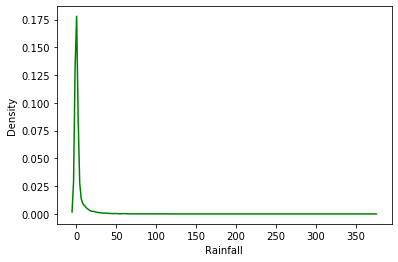

In [487]:
sns.distplot(dfw['Rainfall'],hist=False,color='green')  # Before removing the Skewness
plt.show()

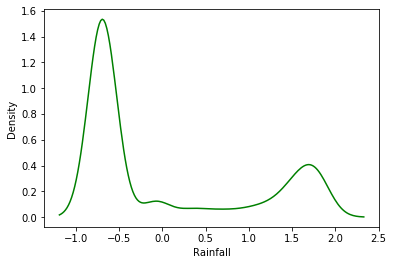

In [488]:
sns.distplot(dfw_new['Rainfall'],hist=False,color='green')  # After removing the Skewness
plt.show()

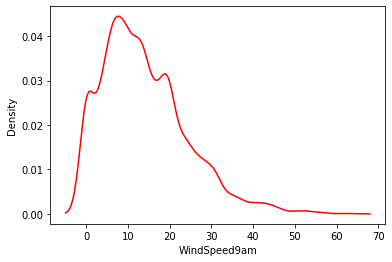

In [489]:
sns.distplot(dfw['WindSpeed9am'],hist=False,color='red')  # Before removing the Skewness
plt.show()

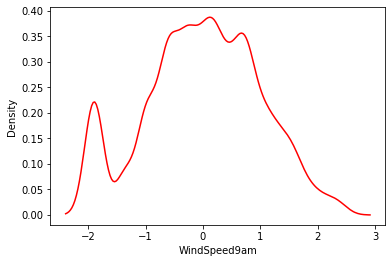

In [490]:
sns.distplot(dfw_new['WindSpeed9am'],hist=False,color='red')  # After removing the Skewness
plt.show()

# Splitting the data into Feature(X) and Target(Y)

In [491]:
x=dfw_new.drop('RainTomorrow',axis=1)
x

Location  MinTemp    MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0          1.0     13.4  22.900000  0.621000         13.0      44.000000   
1          1.0      7.4  25.100000 -0.692437         14.0      44.000000   
2          1.0     12.9  25.700000 -0.692437         15.0      46.000000   
3          1.0      9.2  28.000000 -0.692437          4.0      24.000000   
4          1.0     17.5  32.300000  0.978824         13.0      41.000000   
...        ...      ...        ...       ...          ...            ...   
8420       9.0      2.8  23.400000 -0.692437          0.0      31.000000   
8421       9.0      3.6  25.300000 -0.692437          6.0      22.000000   
8422       9.0      5.4  26.900000 -0.692437          3.0      37.000000   
8423       9.0      7.8  27.000000 -0.692437          9.0      28.000000   
8424       9.0     14.9  23.859976 -0.692437          3.0      40.174469   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           13.0        14.0      0.782930          24.0         71.0   
1            6.0        15.0     -0.987233          22.0         44.0   
2           13.0        15.0      0.698713          26.0         38.0   
3            9.0         0.0     -0.066309           9.0         45.0   
4            1.0         7.0     -0.544791          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420         9.0         1.0      0.143631          11.0         51.0   
8421         9.0         3.0      0.143631           9.0         56.0   
8422         9.0        14.0     -0.293925           9.0         53.0   
8423        10.0         3.0      0.143631           7.0         51.0   
8424         2.0         2.0      0.523948          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  Day  \
0            22.0       1007.7       1007.1     16.9     21.8        0.0    1   
1            25.0       1010.6       1007.8     17.2     24.3        0.0    2   
2            30.0       1007.6       1008.7     21.0     23.2        0.0    3   
3            16.0       1017.6       1012.8     18.1     26.5        0.0    4   
4            33.0       1010.8       1006.0     17.8     29.7        0.0    5   
...           ...          ...          ...      ...      ...        ...  ...   
8420         24.0       1024.6       1020.3     10.1     22.4        0.0   21   
8421         21.0       1023.5       1019.1     10.9     24.5        0.0   22   
8422         24.0       1021.0       1016.8     12.5     26.1        0.0   23   
8423         24.0       1019.4       1016.5     15.1     26.0        0.0   24   
8424         36.0       1020.2       1017.9     15.0     20.9        0.0   25   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[8062 rows x 20 columns]

In [492]:
y=dfw_new['RainTomorrow']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: RainTomorrow, Length: 8062, dtype: float64

# Standard Scaler

In [493]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [494]:
print(x_scaled)

[[-1.51100319  0.05136599 -0.15266125 ... -1.67292525  1.62603465
  -1.66593078]
 [-1.51100319 -1.0635473   0.21311043 ... -1.55925758  1.62603465
  -1.66593078]
 [-1.51100319 -0.04154345  0.31286635 ... -1.44558992  1.62603465
  -1.66593078]
 ...
 [ 1.01625652 -1.43518506  0.51237817 ...  0.82776343 -0.125659
   1.98251344]
 [ 1.01625652 -0.98921975  0.52900416 ...  0.94143109 -0.125659
   1.98251344]
 [ 1.01625652  0.33009431  0.00694424 ...  1.05509876 -0.125659
   1.98251344]]


In [495]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0    -1.511003  0.051366 -0.152661  0.621000     1.226881       0.360982   
1    -1.511003 -1.063547  0.213110 -0.692437     1.439301       0.360982   
2    -1.511003 -0.041543  0.312866 -0.692437     1.651720       0.517481   
3    -1.511003 -0.729073  0.695264 -0.692437    -0.684897      -1.204001   
4    -1.511003  0.813223  1.410181  0.978824     1.226881       0.126235   
...        ...       ...       ...       ...          ...            ...   
8057  1.016257 -1.918314 -0.069531 -0.692437    -1.534576      -0.656257   
8058  1.016257 -1.769659  0.246362 -0.692437    -0.260057      -1.360499   
8059  1.016257 -1.435185  0.512378 -0.692437    -0.897317      -0.186762   
8060  1.016257 -0.989220  0.529004 -0.692437     0.377202      -0.891004   
8061  1.016257  0.330094  0.006944 -0.692437    -0.897317       0.061638   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0       1.246830    1.399654      0.782930      0.634793     0.186905   
1      -0.280357    1.625537     -0.987233      0.418069    -1.453893   
2       1.246830    1.625537      0.698713      0.851516    -1.818514   
3       0.374152   -1.762714     -0.066309     -0.990634    -1.393122   
4      -1.371205   -0.181530     -0.544791      0.201346     0.855378   
...          ...         ...           ...           ...          ...   
8057    0.374152   -1.536831      0.143631     -0.773910    -1.028501   
8058    0.374152   -1.085064      0.143631     -0.990634    -0.724649   
8059    0.374152    1.399654     -0.293925     -0.990634    -0.906960   
8060    0.592321   -1.085064      0.143631     -1.207357    -1.028501   
8061   -1.153035   -1.310948      0.523948     -0.123740    -0.360028   

      Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  RainToday  \
0       -1.622339    -1.680212    -1.392458 -0.145068 -0.105603  -0.541508   
1       -1.455812    -1.196270    -1.274441 -0.091247  0.321841  -0.541508   
2       -1.178269    -1.696900    -1.122704  0.590482  0.133766  -0.541508   
3       -1.955391    -0.028135    -0.431459  0.070215  0.697992  -0.541508   
4       -1.011743    -1.162895    -1.577914  0.016394  1.245120  -0.541508   
...           ...          ...          ...       ...       ...        ...   
8057    -1.511321     1.140001     0.833015 -1.365005 -0.003016  -0.541508   
8058    -1.677847     0.956437     0.630699 -1.221483  0.356037  -0.541508   
8059    -1.511321     0.539246     0.242927 -0.934439  0.629601  -0.541508   
8060    -1.511321     0.272243     0.192348 -0.467993  0.612503  -0.541508   
8061    -0.845217     0.405744     0.428383 -0.485933 -0.259483  -0.541508   

           Day     Month      Year  
0    -1.672925  1.626035 -1.665931  
1    -1.559258  1.626035 -1.665931  
2    -1.445590  1.626035 -1.665931  
3    -1.331922  1.626035 -1.665931  
4    -1.218255  1.626035 -1.665931  
...        ...       ...       ...  
8057  0.600428 -0.125659  1.982513  
8058  0.714096 -0.125659  1.982513  
8059  0.827763 -0.125659  1.982513  
8060  0.941431 -0.125659  1.982513  
8061  1.055099 -0.125659  1.982513  

[8062 rows x 20 columns]

# Variance Inflation Factor

In [496]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Target']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

Features     Target
0        Location   1.584130
1         MinTemp   7.961174
2         MaxTemp  26.067562
3        Rainfall   4.789315
4     WindGustDir   1.607342
5   WindGustSpeed   2.227759
6      WindDir9am   1.356082
7      WindDir3pm   1.488256
8    WindSpeed9am   1.983540
9    WindSpeed3pm   1.978246
10    Humidity9am   3.895122
11    Humidity3pm   5.250590
12    Pressure9am  19.841751
13    Pressure3pm  19.016516
14        Temp9am  17.038400
15        Temp3pm  33.205984
16      RainToday   4.358669
17            Day   1.004355
18          Month   1.156455
19           Year   1.513353

Variance inflation is present in MaxTemp, Pressure9am, Pressure3pm,Tem9am, Temp3pm. Let's drop Max column.

In [497]:
dfw_new=dfw_new.drop(columns=['MaxTemp','Pressure9am','Temp9am','Temp3pm'],axis=1)

In [498]:
x=dfw_new.drop('RainTomorrow',axis=1)
x

Location  MinTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0          1.0     13.4  0.621000         13.0      44.000000        13.0   
1          1.0      7.4 -0.692437         14.0      44.000000         6.0   
2          1.0     12.9 -0.692437         15.0      46.000000        13.0   
3          1.0      9.2 -0.692437          4.0      24.000000         9.0   
4          1.0     17.5  0.978824         13.0      41.000000         1.0   
...        ...      ...       ...          ...            ...         ...   
8420       9.0      2.8 -0.692437          0.0      31.000000         9.0   
8421       9.0      3.6 -0.692437          6.0      22.000000         9.0   
8422       9.0      5.4 -0.692437          3.0      37.000000         9.0   
8423       9.0      7.8 -0.692437          9.0      28.000000        10.0   
8424       9.0     14.9 -0.692437          3.0      40.174469         2.0   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0           14.0      0.782930          24.0         71.0         22.0   
1           15.0     -0.987233          22.0         44.0         25.0   
2           15.0      0.698713          26.0         38.0         30.0   
3            0.0     -0.066309           9.0         45.0         16.0   
4            7.0     -0.544791          20.0         82.0         33.0   
...          ...           ...           ...          ...          ...   
8420         1.0      0.143631          11.0         51.0         24.0   
8421         3.0      0.143631           9.0         56.0         21.0   
8422        14.0     -0.293925           9.0         53.0         24.0   
8423         3.0      0.143631           7.0         51.0         24.0   
8424         2.0      0.523948          17.0         62.0         36.0   

      Pressure3pm  RainToday  Day  Month  Year  
0          1007.1        0.0    1     12  2008  
1          1007.8        0.0    2     12  2008  
2          1008.7        0.0    3     12  2008  
3          1012.8        0.0    4     12  2008  
4          1006.0        0.0    5     12  2008  
...           ...        ...  ...    ...   ...  
8420       1020.3        0.0   21      6  2017  
8421       1019.1        0.0   22      6  2017  
8422       1016.8        0.0   23      6  2017  
8423       1016.5        0.0   24      6  2017  
8424       1017.9        0.0   25      6  2017  

[8062 rows x 16 columns]

In [500]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [501]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [502]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Target']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

Features    Target
0        Location  1.579645
1         MinTemp  1.528040
2        Rainfall  4.700626
3     WindGustDir  1.585554
4   WindGustSpeed  2.133929
5      WindDir9am  1.305711
6      WindDir3pm  1.408902
7    WindSpeed9am  1.888073
8    WindSpeed3pm  1.911811
9     Humidity9am  2.363295
10    Humidity3pm  1.890436
11    Pressure3pm  1.401265
12      RainToday  4.341593
13            Day  1.002572
14          Month  1.129884
15           Year  1.470192

 There is no high inflation factor present in Data. No multicollinearity exist

# Over Sampling Technique

0.0    6227
1.0    1835
Name: RainTomorrow, dtype: int64


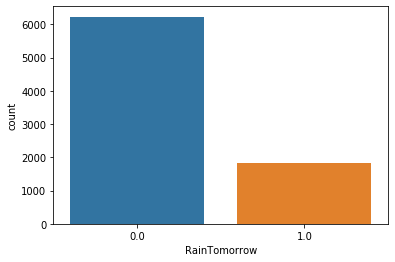

In [503]:
print(dfw_new['RainTomorrow'].value_counts())
sns.countplot(dfw_new['RainTomorrow'])
plt.show()

There is a imbalance in data, let's balance the data using Over Sampling Technique

In [504]:
from imblearn.over_sampling import SMOTE

In [505]:
SM=SMOTE()

x,y=SM.fit_resample(x,y)

0.0    6227
1.0    6227
Name: RainTomorrow, dtype: int64


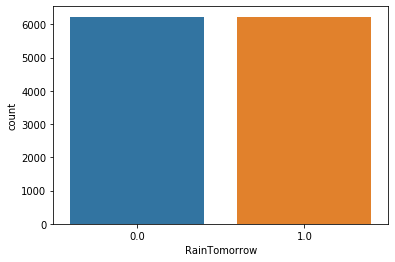

In [506]:
print(y.value_counts())
sns.countplot(y)
plt.show()

We have balanced the data

# Model Building for RainTomorrow Prediction

In [514]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

#### Choosing the Best Random State

In [608]:
max_accu=0
max_RS=0
for i in range(1,50):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=i,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(train_x,train_y)
    rf_pred=rf.predict(test_x)
    score=r2_score(test_y,rf_pred)
    if score>max_accu:
        max_accu=score
        max_RS=i
print("Best Score is",max_accu,"On Random State:",max_RS)

Best Score is 0.979 On Random State: 3


In [609]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=3)

In [610]:
train_x.shape

(8717, 16)

In [611]:
test_x.shape

(3737, 16)

In [612]:
train_y.shape

(8717,)

In [613]:
test_y.shape

(3737,)

# Linear Regression

In [614]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [615]:
lr_pred=lr.predict(test_x)
print("Predicted value:\n",lr_pred)

Predicted value:
 [0.38207624 1.05376438 0.09366212 ... 0.80815545 0.44564963 0.27177064]


In [616]:
print("R2 Score is:",r2_score(test_y,lr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,lr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,lr_pred))

R2 Score is: 0.35519755898734684
Mean Squared Error(MSE): 0.16110502227613938
Mean Absolute Error(MAE): 0.34027449682753297


# DecisionTreeRegressor

In [617]:
dtr=DecisionTreeRegressor()
dtr.fit(train_x,train_y)

DecisionTreeRegressor()

In [618]:
dtr_pred=dtr.predict(test_x)
print("Predicted value:\n",dtr_pred)

Predicted value:
 [0. 1. 0. ... 1. 1. 0.]


In [619]:
print("R2 Score is:",r2_score(test_y,dtr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,dtr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,dtr_pred))

R2 Score is: 0.4484286181847986
Mean Squared Error(MSE): 0.13781107840513782
Mean Absolute Error(MAE): 0.13781107840513782


# Random Forest Regressor

In [620]:
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor()

In [621]:
rfr_pred=rfr.predict(test_x)
print("Predicted value:\n",rfr_pred)

Predicted value:
 [0.11 0.96 0.04 ... 1.   0.83 0.03]


In [622]:
print("R2 Score is:",r2_score(test_y,rfr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,rfr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,rfr_pred))

R2 Score is: 0.7389408365819085
Mean Squared Error(MSE): 0.06522609044688253
Mean Absolute Error(MAE): 0.17134867540808132


# Ada Boost Regressor

In [623]:
ada=AdaBoostRegressor()
ada.fit(train_x,train_y)

AdaBoostRegressor()

In [624]:
ada_pred=ada.predict(test_x)
print("Predicted value:\n",ada_pred)

Predicted value:
 [0.36687233 0.89097744 0.16699029 ... 0.89090909 0.48765155 0.34183945]


In [625]:
print("R2 Score is:",r2_score(test_y,ada_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,ada_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,ada_pred))

R2 Score is: 0.3369864695248118
Mean Squared Error(MSE): 0.1656550949603042
Mean Absolute Error(MAE): 0.36617454537760386


# Gradient Boosting Regressor

In [626]:
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor()

In [627]:
gbr_pred=gbr.predict(test_x)
print("Predicted value:\n",gbr_pred)

Predicted value:
 [ 0.02876593  0.94296179 -0.0669833  ...  0.96530583  0.4829864
  0.04210484]


In [628]:
print("R2 Score is:",r2_score(test_y,gbr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,gbr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,gbr_pred))

R2 Score is: 0.5340411031325819
Mean Squared Error(MSE): 0.11642064869000339
Mean Absolute Error(MAE): 0.2728078689861676


# KNeighbors Regressor

In [629]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(train_x,train_y)

KNeighborsRegressor()

In [630]:
knn_pred=knn.predict(test_x)
print("Predicted value:\n",knn_pred)

Predicted value:
 [0.  1.  0.2 ... 1.  1.  0. ]


In [631]:
print("R2 Score is:",r2_score(test_y,knn_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,knn_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,knn_pred))

R2 Score is: 0.59627116875911
Mean Squared Error(MSE): 0.10087235750602089
Mean Absolute Error(MAE): 0.1700829542413701


# Support Vector Regressor

In [632]:
svr=SVR()
svr.fit(train_x,train_y)

SVR()

In [633]:
svr_pred=svr.predict(test_x)
print("Predicted value:\n",svr_pred)

Predicted value:
 [ 0.10011782  1.0323646  -0.11471232 ...  1.02535294  0.90631459
  0.02774817]


In [634]:
print("R2 Score is:",r2_score(test_y,svr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,svr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,svr_pred))

R2 Score is: 0.5721533170049553
Mean Squared Error(MSE): 0.1068982451220845
Mean Absolute Error(MAE): 0.22876549907428817


In [636]:
from sklearn.tree import ExtraTreeRegressor

etr=ExtraTreeRegressor()
etr.fit(train_x,train_y)

ExtraTreeRegressor()

In [638]:
etr_pred=etr.predict(test_x)
print("Predicted value:\n",etr_pred)

Predicted value:
 [0. 1. 0. ... 1. 1. 0.]


In [639]:
print("R2 Score is:",r2_score(test_y,etr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,etr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,etr_pred))

R2 Score is: 0.4334344446985602
Mean Squared Error(MSE): 0.14155739898314157
Mean Absolute Error(MAE): 0.14155739898314157


In [640]:
for rg in (lr,dtr, etr, knn, ada, gbr, svr, rfr):
    rg.fit(train_x,train_y)
    rg_pred=rg.predict(test_x)
    print(rg.__class__.__name__,r2_score(test_y,rg_pred))

LinearRegression 0.35519755898734684
DecisionTreeRegressor 0.42915039513106346
ExtraTreeRegressor 0.4366474818741827
KNeighborsRegressor 0.59627116875911
AdaBoostRegressor 0.3218367268496496
GradientBoostingRegressor 0.5340824257564089
SVR 0.5721533170049553
RandomForestRegressor 0.7376766135545402


After analysis several models, the score is not good. Only RandomForestRegressor gives a moderate score 73%

# Cross Validation Score

In [641]:
from sklearn.model_selection import cross_val_score

In [645]:
print("Cross Validation score for Linear Regression:",-(cross_val_score(lr,x,y,cv=5)).mean())

Cross Validation score for Linear Regression: 0.17536554109774913


In [646]:
print("Cross Validation score for Decision Tree Regressor:",-(cross_val_score(dtr,x,y,cv=5)).mean())

Cross Validation score for Decision Tree Regressor: 0.6839421714624919


In [647]:
print("Cross Validation score for KNeighbors Regressor:",-(cross_val_score(knn,x,y,cv=5)).mean())

Cross Validation score for KNeighbors Regressor: 0.4672063712449791


In [648]:
print("Cross Validation score for Support Vector Regressor:",-(cross_val_score(svr,x,y,cv=5)).mean())

Cross Validation score for Support Vector Regressor: 0.3455556215230762


In [649]:
print("Cross Validation score for Ada Boost Regressor:",-(cross_val_score(ada,x,y,cv=5)).mean())

Cross Validation score for Ada Boost Regressor: 0.32164798293289404


In [650]:
print("Cross Validation score for Gradient Boosting Regressor:",-(cross_val_score(gbr,x,y,cv=5)).mean())

Cross Validation score for Gradient Boosting Regressor: 0.24692912841677267


In [651]:
print("Cross Validation score for Extra Tree Regressor:",-(cross_val_score(etr,x,y,cv=5)).mean())

Cross Validation score for Extra Tree Regressor: 0.802082194257409


In [652]:
print("Cross Validation score for Random Forest Regressor:",-(cross_val_score(rfr,x,y,cv=5)).mean())

Cross Validation score for Random Forest Regressor: 0.19899445999081616


After evaluation of various models and cross validation score, I choose Random Forest Regressor as my final model, Let's do the hyer parameter tuning to improve the acuracy

# Hyper Parameter Tuning

In [674]:
params={'n_estimators':[10,50],
       'max_depth':[2,4],
       'min_samples_leaf':range(2,8,1),
        'min_samples_split':range(2,8,1),
        'max_features':['auto','log2']}

In [675]:
grid_search=GridSearchCV(estimator=rfr,param_grid=params,cv=3)

In [ ]:
grid_search.fit(train_x,train_y)

In [681]:
final_model=RandomForestRegressor(
                                  max_depth=15,
                                  max_features='auto',
                                  min_samples_leaf=2,
                                  min_samples_split=10,
                                  n_estimators=99,
                                  random_state=3)

In [682]:
final_model.fit(train_x,train_y)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=99, random_state=3)

In [683]:
final_model_pred=final_model.predict(test_x)
print("Predicted value:\n",final_model_pred)

Predicted value:
 [0.16621692 0.91039044 0.05119134 ... 0.99312469 0.69206138 0.05930697]


In [684]:
print("R2 Score is:",r2_score(test_y,final_model_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,final_model_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,final_model_pred))

R2 Score is: 0.6851090140377778
Mean Squared Error(MSE): 0.07867606584790178
Mean Absolute Error(MAE): 0.20179986231378969


After tuning we got 68% score in Random Forest Regressor, It didn't increase the score

# ROC AUC Score

In [688]:
print('ROC AUC Score:',roc_auc_score(test_y,final_model_pred))

ROC AUC Score: 0.9651157192061726


# Saving the Model

In [689]:
import pickle

In [690]:
filename='Rainfall_prediction.pickle'

In [691]:
pickle.dump(final_model,open(filename,'wb'))

In [692]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([0.16621692, 0.91039044, 0.05119134, ..., 0.99312469, 0.69206138,
       0.05930697])

In [694]:
df=pd.DataFrame([loaded_model.predict(test_x)[:],test_y[:]],index=['Predicted','Actual'])
df

0        1         2         3         4         5     \
Predicted  0.166217  0.91039  0.051191  0.237253  0.081394  0.969112   
Actual     0.000000  1.00000  0.000000  0.000000  0.000000  1.000000   

               6         7         8         9     ...      3727      3728  \
Predicted  0.137292  0.454805  0.792941  0.104155  ...  0.139082  0.183789   
Actual     0.000000  0.000000  1.000000  0.000000  ...  0.000000  0.000000   

               3729      3730      3731      3732      3733      3734  \
Predicted  0.579133  0.008689  0.953598  0.782776  0.636225  0.993125   
Actual     1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   

               3735      3736  
Predicted  0.692061  0.059307  
Actual     1.000000  0.000000  

[2 rows x 3737 columns]

Here is the Predicted and Actual Value of RainTomorrow. Based on this prediction we can predict whether tomorrow it will rain or not.

In [695]:
df.to_csv('rainfall_predictions.csv')

# Model Building for Rainfall Prediction

In [696]:
X=dfw_new.drop('Rainfall',axis=1)

In [697]:
Y=dfw_new['Rainfall']

In [698]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [699]:
print(x_scaled)

[[-1.51100319  0.05136599  0.62100037 ... -1.67292525  1.62603465
  -1.66593078]
 [-1.51100319 -1.0635473  -0.69243714 ... -1.55925758  1.62603465
  -1.66593078]
 [-1.51100319 -0.04154345 -0.69243714 ... -1.44558992  1.62603465
  -1.66593078]
 ...
 [ 1.01625652 -1.43518506 -0.69243714 ...  0.82776343 -0.125659
   1.98251344]
 [ 1.01625652 -0.98921975 -0.69243714 ...  0.94143109 -0.125659
   1.98251344]
 [ 1.01625652  0.33009431 -0.69243714 ...  1.05509876 -0.125659
   1.98251344]]


In [701]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=.30,random_state=42)

# LinearRegression

In [702]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [703]:
lr_pred=lr.predict(test_x)
print("Predicted value:\n",lr_pred)

Predicted value:
 [-0.65304589  1.52530143 -0.08225602 ... -0.46949756 -0.42699328
 -0.48672747]


In [704]:
print("R2 Score is:",r2_score(test_y,lr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,lr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,lr_pred))

R2 Score is: 0.7920449263682527
Mean Squared Error(MSE): 0.2037488261991305
Mean Absolute Error(MAE): 0.29213021124681643


# Decision Tree Regressor

In [706]:
dtr=DecisionTreeRegressor()
dtr.fit(train_x,train_y)

DecisionTreeRegressor()

In [707]:
dtr_pred=dtr.predict(test_x)
print("Predicted value:\n",dtr_pred)

Predicted value:
 [-0.69243714  1.38246471 -0.69243714 ... -0.69243714 -0.69243714
  1.52463659]


In [708]:
print("R2 Score is:",r2_score(test_y,dtr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,dtr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,dtr_pred))

R2 Score is: 0.7825484114372799
Mean Squared Error(MSE): 0.2130532578553382
Mean Absolute Error(MAE): 0.18768222938862425


# KNeighborsRegressor

In [709]:
knn=KNeighborsRegressor()
knn.fit(train_x,train_y)

KNeighborsRegressor()

In [710]:
knn_pred=knn.predict(test_x)
print("Predicted value:\n",knn_pred)

Predicted value:
 [-0.42974964  0.29757444 -0.38890188 ...  0.30866499  1.55986206
  0.74853633]


In [711]:
print("R2 Score is:",r2_score(test_y,knn_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,knn_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,knn_pred))

R2 Score is: 0.2756938451546904
Mean Squared Error(MSE): 0.709655822679615
Mean Absolute Error(MAE): 0.5874636399856331


# Ada Boost Regressor

In [712]:
ada=AdaBoostRegressor()
ada.fit(train_x,train_y)

AdaBoostRegressor()

In [713]:
ada_pred=ada.predict(test_x)
print("Predicted value:\n",ada_pred)

Predicted value:
 [-1.50378814e-01  1.57331533e+00 -1.08972761e-01 ... -2.66078586e-01
  4.43449982e-04 -5.99804884e-02]


In [714]:
print("R2 Score is:",r2_score(test_y,ada_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,ada_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,ada_pred))

R2 Score is: 0.7261987088231933
Mean Squared Error(MSE): 0.26826319124999753
Mean Absolute Error(MAE): 0.43270779229337936


# Random Forest Regressor

In [718]:
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor()

In [719]:
rfr_pred=rfr.predict(test_x)
print("Predicted value:\n",rfr_pred)

Predicted value:
 [-0.40962171  1.58529345 -0.32355695 ... -0.6508578   1.10125921
  0.77708364]


In [720]:
print("R2 Score is:",r2_score(test_y,rfr_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,rfr_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,rfr_pred))

R2 Score is: 0.8788417480707096
Mean Squared Error(MSE): 0.11870761883235348
Mean Absolute Error(MAE): 0.21126861755225274


In [724]:
for rg in (lr,dtr,ada,knn,rfr):
    rg.fit(train_x,train_y)
    rg_pred=rg.predict(test_x)
    print(rg.__class__.__name__,r2_score(test_y,rg_pred))

LinearRegression 0.7920449263682527
DecisionTreeRegressor 0.7835130498703917
AdaBoostRegressor 0.7521734967324691
KNeighborsRegressor 0.2756938451546904
RandomForestRegressor 0.877798094966008


Random Forest Gives a good score 87%

# Cross Validation Score

In [725]:
print("Cross Validation Score for Linear Regression:",cross_val_score(lr,X,Y,cv=5).mean())

Cross Validation Score for Linear Regression: 0.7823270242170018


In [726]:
print("Cross Validation Score for Decision Tree Regressor:",cross_val_score(dtr,X,Y,cv=5).mean())

Cross Validation Score for Decision Tree Regressor: 0.6010320817698728


In [727]:
print("Cross Validation Score for Ada Boost Regressor",cross_val_score(ada,X,Y,cv=5).mean())

Cross Validation Score for Ada Boost Regressor 0.6607897539281107


In [728]:
print("Cross Validation Score for KNeighbors Regressor:",cross_val_score(knn,X,Y,cv=5).mean())

Cross Validation Score for KNeighbors Regressor: 0.18003887726645365


In [729]:
print("Cross Validation Score for Random Forest Regressor:",cross_val_score(rfr,X,Y,cv=5).mean())

Cross Validation Score for Random Forest Regressor: 0.8157417598633874


On the basis of analysis  various model and cross validation score, I choose Random Forest Regressor as my final model.

# Hyper parameter tuning

In [733]:
final_mod=RandomForestRegressor(
                                  max_depth=15,
                                  max_features='auto',
                                  min_samples_leaf=2,
                                  min_samples_split=10,
                                  n_estimators=99,
                                  random_state=3)

In [734]:
final_mod.fit(train_x,train_y)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=99, random_state=3)

In [736]:
final_mod_pred=final_mod.predict(test_x)
print("Predicted value:\n",final_mod_pred)

Predicted value:
 [-0.4920105   1.57290746 -0.1986784  ... -0.54316122  0.63968421
 -0.10279178]


In [737]:
print("R2 Score is:",r2_score(test_y,final_mod_pred))
print("Mean Squared Error(MSE):",mean_squared_error(test_y,final_mod_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(test_y,final_mod_pred))

R2 Score is: 0.854499953826608
Mean Squared Error(MSE): 0.14255705860894224
Mean Absolute Error(MAE): 0.23456797284043596


After tuning we got the score 85%

# Saving the Model

In [742]:
filename='whether_prediction.pickle'

In [743]:
pickle.dump(rfr,open(filename,'wb'))

In [744]:
load_model=pickle.load(open(filename,'rb'))
load_model.predict(test_x)

array([-0.50838639,  1.61838088, -0.30956585, ..., -0.66742865,
        1.0092515 ,  0.88793733])

In [745]:
dfr=pd.DataFrame([load_model.predict(test_x)[:],test_y[:]],index=['Predicted','Actual'])
dfr

0         1         2         3         4         5     \
Predicted -0.508386  1.618381 -0.309566 -0.541069  0.197223  1.633151   
Actual    -0.692437  1.793068 -0.692437 -0.692437  0.339436  1.738284   

               6         7         8         9     ...      2409      2410  \
Predicted -0.597753 -0.581366 -0.567146  0.761885  ... -0.682118 -0.457055   
Actual    -0.692437 -0.692437 -0.692437  0.825239  ... -0.692437 -0.692437   

               2411      2412      2413      2414      2415      2416  \
Predicted -0.473043 -0.515358 -0.646161 -0.510338 -0.648672 -0.667429   
Actual    -0.692437 -0.692437 -0.692437 -0.692437 -0.692437 -0.692437   

               2417      2418  
Predicted  1.009252  0.887937  
Actual     1.524637  1.524637  

[2 rows x 2419 columns]

This is the predicted and Actual value of Rainfall

In [746]:
dfr.to_csv('Rainfall_forcasting.csv')

# a) Prediction of RainTomorrorw

In [747]:
df.T

Predicted  Actual
0      0.166217     0.0
1      0.910390     1.0
2      0.051191     0.0
3      0.237253     0.0
4      0.081394     0.0
...         ...     ...
3732   0.782776     1.0
3733   0.636225     1.0
3734   0.993125     1.0
3735   0.692061     1.0
3736   0.059307     0.0

[3737 rows x 2 columns]

Here is the prediction of whether it will rain tomorrow or not.

# b)Prediction of Rainfall

In [748]:
dfr.T

Predicted    Actual
0     -0.508386 -0.692437
1      1.618381  1.793068
2     -0.309566 -0.692437
3     -0.541069 -0.692437
4      0.197223  0.339436
...         ...       ...
2414  -0.510338 -0.692437
2415  -0.648672 -0.692437
2416  -0.667429 -0.692437
2417   1.009252  1.524637
2418   0.887937  1.524637

[2419 rows x 2 columns]

This is the prediction of how much rainfall could be there in the city.